# Projet ML finance : 
# I- Index Tracking 

## Elastic Net



In [0]:
# Pour s'adapter au version 2 et 3 de python
from __future__ import division, print_function, unicode_literals
# On importe les modules habituels pour manier les données
import numpy as np
import pandas as pd
import os


# Pour rendre ce notebook stable à travers les diverses manipulations on fixe le générateur aléatoire
np.random.seed(42)

# Pour tracer de belles figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'family': 'serif','color':  'darkred','weight': 'normal','size': 16}

## Application directe de la théorie des conditions NEIC et NIR : cas où les 2 conditions sont satisfaites

### Lecture du jeu de données, visualisation

In [0]:
#Lecture des données
Data=pd.read_csv('Data_sujet6.csv',delimiter=';') # les 2 conditions satisfaites


In [3]:
#Premières observations du dataframe
Data.head()

X1        X2        X3  ...        X7        X8         y
0 -0.962370 -0.296402 -0.031618  ...  0.977778  0.620579 -4.236836
1  1.158175 -0.363660 -0.170173  ...  0.039358 -0.667314  1.770955
2 -0.439020  1.158601  0.602707  ... -2.204298 -2.027033 -0.238140
3 -1.292076  0.448003  1.152135  ...  0.100133  0.120878 -4.141465
4  2.501391  0.679927 -0.548416  ... -0.346978  1.080361  6.827810

[5 rows x 9 columns]

In [4]:
#On affiche le type des variables, et on vérifie qu'il n'y ait pas de valeurs NA
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      20 non-null     float64
 1   X2      20 non-null     float64
 2   X3      20 non-null     float64
 3   X4      20 non-null     float64
 4   X5      20 non-null     float64
 5   X6      20 non-null     float64
 6   X7      20 non-null     float64
 7   X8      20 non-null     float64
 8   y       20 non-null     float64
dtypes: float64(9)
memory usage: 1.5 KB


### Séparation de l'échantillon en train set / test set

In [0]:
#On sélectionne 70% du jeu de données, pour l'échantillon d'apprentissage et 30% pour l'échantillon de test
from sklearn.model_selection import train_test_split
train_X , test_X = train_test_split(Data, test_size=0.3, random_state=42)

### Séparation des variables en features : x1,..,x8 / target à prédire : y

In [0]:
features,target=Data.drop("y", axis=1) ,Data["y"]
train_features , train_target= train_X.drop("y", axis=1) ,train_X["y"] 
test_features, test_target = test_X.drop("y", axis=1) ,test_X["y"] 

### Test de la régression lasso sur quelque valeurs de lambda

In [0]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
def LASSO(lamb):
    clf = linear_model.Lasso(alpha=lamb, fit_intercept= False, tol = 10**-8, positive = True)
    return(clf)



In [8]:

few_lambda=np.linspace(0.1,3,num=10) #Grille continue entre 0.01 et 1 , 5 points
few_lambda.sort()
for i in few_lambda:
    model=LASSO(lamb=i)
    model.fit(features,target)
    #On affiche chaque lambda et l'estimation de beta associé
    print('lambda=',np.round(i,1),": Beta=", np.round(model.coef_,3)) 

lambda= 0.1 : Beta= [3.07  0.991 0.158 0.246 1.788 0.    0.    0.   ]
lambda= 0.4 : Beta= [2.766 0.615 0.    0.    1.58  0.    0.    0.   ]
lambda= 0.7 : Beta= [2.494 0.251 0.    0.    1.366 0.    0.    0.   ]
lambda= 1.1 : Beta= [2.23  0.    0.    0.    1.153 0.    0.    0.   ]
lambda= 1.4 : Beta= [1.988 0.    0.    0.    0.944 0.    0.    0.   ]
lambda= 1.7 : Beta= [1.747 0.    0.    0.    0.735 0.    0.    0.   ]
lambda= 2.0 : Beta= [1.505 0.    0.    0.    0.526 0.    0.    0.   ]
lambda= 2.4 : Beta= [1.263 0.    0.    0.    0.318 0.    0.    0.   ]
lambda= 2.7 : Beta= [1.021 0.    0.    0.    0.109 0.    0.    0.   ]
lambda= 3.0 : Beta= [0.766 0.    0.    0.    0.    0.    0.    0.   ]


### Application de la cross validation à 10 passes pour le choix de lambda

In [9]:
from sklearn.model_selection import cross_validate 

#Contiendra la moyenne de l'erreur commise sur les 10 sous échantillons de test
AVG_MSE_per_lambda=np.zeros(500)  

#Grille de valeurs à tester: start=0, stop=5 , pas=5/500=0.01
grid_lambda=np.linspace(0,5,500) 

for i,hyper_lambda in enumerate(list(grid_lambda)): 
    #On appel notre model Lasso avec chaque lambda
    model=LASSO(hyper_lambda)
    #Cross Validation à 10 passes, l'algo maximise le score d'ou le fait de fournir score= - MSE
    scores = cross_validate(model, train_features , train_target, scoring='neg_mean_squared_error',
                            cv=10, return_train_score=False)
    #On sauvegarde l'erreur moyenne quadratique 
    AVG_MSE_per_lambda[i]= - np.mean(scores['test_score'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4333156113353294, tolerance: 2.711908647708673e-06
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/

In [10]:
#Quelque statistiques lors de la cross validation (10 passes)
scores

{'fit_time': array([0.00164604, 0.00150013, 0.00162411, 0.00157356, 0.00151992,
        0.00153041, 0.00156713, 0.00152087, 0.00169802, 0.00158644]),
 'score_time': array([0.00072718, 0.00074196, 0.00077462, 0.00076461, 0.0007472 ,
        0.00072575, 0.00076246, 0.00075531, 0.00072932, 0.00079107]),
 'test_score': array([-15.76974187, -28.93829724,  -0.58489221, -38.5384979 ,
        -46.61898526, -12.55470894,  -6.93286273,  -1.56527561,
        -65.88338353,  -1.51227402])}

### On retient le lambda sélectionné par validation croisée puis on estime notre coefficient Beta

In [11]:
i_min=AVG_MSE_per_lambda.argmin()
lambda_crossval=grid_lambda[i_min]
print("Le lambda retenu par Cross Validation est :",np.round(lambda_crossval,4))

Le lambda retenu par Cross Validation est : 0.0301


In [12]:
#On réentraine le model avec le lambda obtenu par cross validation 
model=LASSO(lambda_crossval)
model.fit(train_features, train_target)
ypred=model.predict(test_features)
#Notre Beta
print("Beta original=",['3', '1.5' ,  ' 0' ,  ' 0' , ' 2.00',  ' 0',  ' 0', ' 0'])
Beta_Lasso=np.round(model.coef_,3)
y_no_noise=np.dot(test_features,(np.array([3,1.5,0,0,2,0,0,0])))
MSE_LASSO=np.linalg.norm(ypred-y_no_noise)**2
print("Beta estimé=",list(Beta_Lasso))
print("Erreur quadratique=",MSE_LASSO)

Beta original= ['3', '1.5', ' 0', ' 0', ' 2.00', ' 0', ' 0', ' 0']
Beta estimé= [3.096, 1.339, 0.515, 0.582, 1.724, 0.0, 0.0, 0.0]
Erreur quadratique= 3.7104784385344307


### NIR et NEIC condition

In [13]:
nb_obs = features.shape[0]
X = np.array(features)


beta = [3, 1.5 ,  0 ,   0 , 2,   0,  0, 0]
X_1 = features[['X1', 'X2', 'X5']]
X_2 = features[['X3', 'X4', 'X6', 'X7', 'X8']]
q = X_1.shape[1]
p_q = X_2.shape[1]
unitq = np.ones((q,),dtype=int)
unitp_q = np.ones((p_q,),dtype=int) 

C_11 = np.dot(X_1.transpose(), X_1)/nb_obs
C_21 = np.dot(X_2.transpose(), X_1)/nb_obs
nir = np.dot(C_21, np.dot(np.linalg.inv(C_11),unitq))
if np.any(nir < 1):
    print("the nir condition is repected et donc the neic condition aussi : la sélection lasso est consistante")
else:
    print("the nir et the neic condition is violated ")
 
    

the nir condition is repected et donc the neic condition aussi : la sélection lasso est consistante


In [0]:
def neic(lamb1, lamb2):
    #lamb1 = alfa*lambda
    #lamb2 = (1-alfa)*lambda
    nb_obs = features.shape[0]
    X = np.array(features)
    beta = [3, 1.5 ,  0 ,   0 , 2,   0,  0, 0]
    beta_1 = np.array([3,1.5,2])

    X_1 = features[['X1', 'X2', 'X5']]
    X_2 = features[['X3', 'X4', 'X6', 'X7', 'X8']]
    q = X_1.shape[1]
    p_q = X_2.shape[1]
    unitq = np.ones((q,),dtype=int)
    unitp_q = np.ones((p_q,),dtype=int) 

    C_11 = np.dot(X_1.transpose(), X_1)/nb_obs
    C_21 = np.dot(X_2.transpose(), X_1)/nb_obs
    neic = np.dot(C_21, np.dot(np.linalg.inv(C_11 + (lamb2/nb_obs)*np.identity(q)),(unitq+(2*lamb2/lamb1)*beta_1)))
    if np.any(neic < 1):
          print("the neic condition is respected : la sélection lasso est consistante")
                  
    else:
          print("the neic condition is violated ")
            

### Graph de $\lambda \longrightarrow ||\hat{\beta}(\lambda)||_{0}$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.666252010916298, tolerance: 3.027303485197351e-06
  positive)


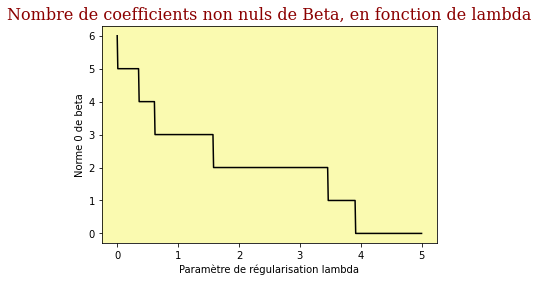

In [15]:
BETA_NORM=np.zeros(500) # Contiendra les normes 1 des betas calculés
for i,lbd in enumerate(list(grid_lambda)): 
        model=LASSO(lbd)
        model.fit(train_features , train_target)
        BETA_NORM[i]=np.linalg.norm(model.coef_,ord=0)
fig = plt.figure()
ax = fig.add_subplot(111)                      
plt.plot(grid_lambda,BETA_NORM,'k')
plt.title('Nombre de coefficients non nuls de Beta, en fonction de lambda' ,fontdict=font)
plt.xlabel('Paramètre de régularisation lambda')
plt.ylabel('Norme 0 de beta')
ax.set_facecolor('#fafab0')

La fonction est nettement décroissante; ainsi, plus le paramètre de pénalisation est grand, plus notre estimation $\hat{\beta}$ est sparse, et donc moins on interprète de variables. On constate donc empiriquement que la régression Lasso permet la séléction de variables, bien que la pénalisation mise en oeuvre utilise la norme $1$ et non pas la norme $0$. 

### Graph de $ \hspace{2pt} \lambda \longrightarrow ||X\hat{\beta}(\lambda) -X\beta^{0}||_{2}^{2} \quad \text{(}\hspace{2pt} \sigma^{2}=1 \quad \beta^{0}=(3,1.5,0,0,2,0,0,0) \text{ )}$ 

In [16]:
#Calcul des points du graph
AVG_MSE_True=np.zeros(500)  #L'erreur pour le B0 de l'énoncé(question 13)
Beta_0=np.array([3,0,1.5,0,2,0,0,0])

#Grille de valeurs à tester: start=0, stop=5 , pas=5/500=0.01
grid_lambda=np.linspace(0,5,500) 


for i,hyper_lambda in enumerate(list(grid_lambda)): 
    #On appel notre model Lasso avec chaque lambda
    model=LASSO(hyper_lambda)
    
    #On enregistre l'erreur moyenne quadratique pour les vrais paramètres
    model.fit(train_features,train_target)
    ypred=model.predict(test_features)
    y_no_noise=np.dot(test_features,Beta_0)
    AVG_MSE_True[i]=np.linalg.norm(ypred-y_no_noise)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.666252010916298, tolerance: 3.027303485197351e-06
  positive)


In [0]:
# Calcul du lambda minimisant l'erreur quadratique ci dessus
imin_=AVG_MSE_True.argmin()
lambda_min=grid_lambda[imin_]

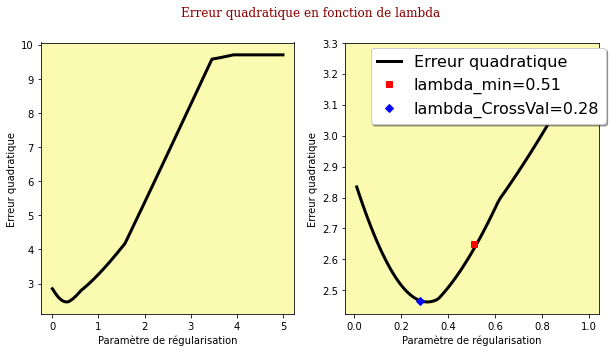

In [18]:
#Plot de la fonction d'erreur quadratique
fig=plt.figure()

ax=fig.add_subplot(121) 
plt.plot(grid_lambda,AVG_MSE_True,'k',linewidth=3)

plt.ylabel('Erreur quadratique')
plt.xlabel('Paramètre de régularisation')
ax.set_facecolor('#fafab0')
ax=fig.add_subplot(122)
plt.plot(grid_lambda[1:100],AVG_MSE_True[1:100],'k',linewidth=3)
plt.ylabel('Erreur quadratique')
plt.xlabel('Paramètre de régularisation')

#Lambda qui minimise la fonction  (=0.51)
plt.plot([0.51],[AVG_MSE_True[52]],'rs',color='r')

#Lambda obtenu par cross validation (=0.28)
plt.plot([0.28],[AVG_MSE_True[29]],'D',color='b')

plt.legend(('Erreur quadratique', 'lambda_min=0.51','lambda_CrossVal=0.28'),
           shadow=True, loc=(0.1, 0.7), handlelength=1.5, fontsize=16)

fig.set_figheight(5)
fig.set_figwidth(10)
ax.set_facecolor('#fafab0')
plt.suptitle('Erreur quadratique en fonction de lambda',fontdict=font)
plt.show()



### ELASTIC NET

In [0]:
AVG_MSE_ELASTIC_NET=np.zeros(2000) 

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import itertools
from pprint import pprint

def EN(penalisation, alfa):
    clf = ElasticNet(alpha = penalisation, random_state=42, l1_ratio = alfa, fit_intercept = False, tol = 10**-8, positive = True, copy_X=True)
    return(clf)

#Grille de 2000 valeurs à tester pour alpha et l1_ratio
grid_alpha=np.linspace(0,1,100) 
grid_ratio=np.linspace(0,1,20) 
list_param=[list(grid_alpha),list(grid_ratio)]
result = list(itertools.product(*list_param))



In [21]:
for i,(a,r) in enumerate(result): 
    #On appel notre model Lasso avec chaque lambda
    model = EN(a,r)
    # model=ElasticNet(alpha=a, l1_ratio=r, random_state=42, fit_intercept=False, normalize=False, copy_X=True)
    #Validation croisée, l'algo maximise le score d'ou le fait de fournir score= - MSE
    scores = cross_validate(model, train_features , train_target, scoring='neg_mean_squared_error',
                            cv=10, return_train_score=False)
    #On sauvegarde l'erreur moyenne quadratique 
    AVG_MSE_ELASTIC_NET[i]= - np.mean(scores['test_score'])

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.4333156113353294, tolerance: 2.711908647708673e-06
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/

In [22]:
imin=AVG_MSE_ELASTIC_NET.argmin() 
alpha_CV,ratio_CV=np.round(result[imin],4)
print("Le alpha et le ratio retenus par Cross Validation sont :",np.round([alpha_CV,ratio_CV],4))

Le alpha et le ratio retenus par Cross Validation sont : [0.0505 0.2632]


In [23]:
#On réentraine le model avec le lambda obtenu par cross validation 
#model=ElasticNet(alpha=alpha_CV,l1_ratio=ratio_CV,random_state=42, fit_intercept=False, normalize=False, copy_X=True)
model = EN(alpha_CV,ratio_CV)
model.fit(train_features, train_target) 
#Notre Beta
Beta_Elastic=np.round(model.coef_,3)
print("La valeur correcte de Beta  =",['3', '1.5' ,  ' 0' ,  ' 0' , ' 2.00',  ' 0',  ' 0', ' 0'])
print("Beta estimé avec Elastic Net=",list(Beta_Elastic))
print("Beta estimé avec Lasso      =",list(Beta_Lasso))
np.round(model.coef_,3)

ypred=model.predict(test_features)
MSE_ELASTIC=np.linalg.norm(ypred-y_no_noise)**2
print('Erreur Quadrative Lasso+ Cross Validation:', MSE_LASSO)
print('Erreur Quadrative Elastic+ Cross Validation:', MSE_ELASTIC)

La valeur correcte de Beta  = ['3', '1.5', ' 0', ' 0', ' 2.00', ' 0', ' 0', ' 0']
Beta estimé avec Elastic Net= [2.998, 1.317, 0.504, 0.566, 1.715, 0.0, 0.007, 0.0]
Beta estimé avec Lasso      = [3.096, 1.339, 0.515, 0.582, 1.724, 0.0, 0.0, 0.0]
Erreur Quadrative Lasso+ Cross Validation: 3.7104784385344307
Erreur Quadrative Elastic+ Cross Validation: 8.182123505993935


Le lasso sélectionne mieux les variables que l'élastic net sur cet échantillon simulé, bien que l'erreur quadratique soit plus faible (critère pour le choix du lambda) et le beta est proche de 0.

In [24]:
neic(lamb1 = alpha_CV *ratio_CV, lamb2 = alpha_CV *(1-ratio_CV) )

the neic condition is respected : la sélection lasso est consistante


## Application directe de la théorie des conditions NEIC et NIR : cas où NIR est satisfaite et pas NEIC

Si on choisit maintenant les lambdas tels que la condition NEIC ne soit pas satisfaite.

In [0]:
def neic_not_holds(lamb1, lamb2):
    #lamb1 = alfa*lambda
    #lamb2 = (1-alfa)*lambda
    nb_obs = features.shape[0]
    X = np.array(features)
    beta = [3, 1.5 ,  0 ,   0 , 2,   0,  0, 0]
    beta_1 = np.array([3,1.5,2])

    X_1 = features[['X1', 'X2', 'X5']]
    X_2 = features[['X3', 'X4', 'X6', 'X7', 'X8']]
    q = X_1.shape[1]
    p_q = X_2.shape[1]
    unitq = np.ones((q,),dtype=int)
    unitp_q = np.ones((p_q,),dtype=int) 

    C_11 = np.dot(X_1.transpose(), X_1)/nb_obs
    C_21 = np.dot(X_2.transpose(), X_1)/nb_obs
    neic = np.dot(C_21, np.dot(np.linalg.inv(C_11 + (lamb2/nb_obs)*np.identity(q)),(unitq+(2*lamb2/lamb1)*beta_1)))
    if np.any(neic > 1):
      lamb = np.array([lamb1,lamb2])
      return(lamb)
    else:
      lamb = np.array([0,0])
      return(lamb)
         

In [0]:
#Grille de 2000 valeurs à tester pour alpha et l1_ratio: on reprend la grille de valisation croisée
grid_alpha=np.linspace(0,1,100) 
grid_ratio=np.linspace(0,1,20) 
list_param=[list(grid_alpha),list(grid_ratio)]
result = list(itertools.product(*list_param))

In [27]:
for i,(a,r) in enumerate(result): 
  lamb = neic_not_holds(a*r, a*(1-r))
  if lamb[0]!=0 and lamb[1]!=0:
    print(lamb)
    alpha_NNH = lamb[0]
    ratio_NNH = lamb[1]
    break


[0.00053163 0.00956938]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars


In [28]:
model_NNH = EN(alpha_NNH,ratio_NNH)
model_NNH.fit(train_features, train_target) 
#Notre Beta
Beta_Elastic_NNH = np.round(model_NNH.coef_,3)
print("La valeur correcte de Beta  =",['3', '1.5' ,  ' 0' ,  ' 0' , ' 2.00',  ' 0',  ' 0', ' 0'])
print("Beta estimé avec Elastic Net=",list(Beta_Elastic))
print("Beta estimé avec Elastic Net où Neic Not Holds=",list(Beta_Elastic_NNH))
np.round(model_NNH.coef_,3)

#ypred_NNH=model_NNH.predict(test_features)
#MSE_ELASTIC_NNH=np.linalg.norm(ypred_NNH-y_no_noise)**2
#print('Erreur Quadrative Lasso+ Cross Validation:', MSE_ELASTIC)
#print('Erreur Quadrative Elastic+ Cross Validation:', MSE_ELASTIC_NNH)

La valeur correcte de Beta  = ['3', '1.5', ' 0', ' 0', ' 2.00', ' 0', ' 0', ' 0']
Beta estimé avec Elastic Net= [2.998, 1.317, 0.504, 0.566, 1.715, 0.0, 0.007, 0.0]
Beta estimé avec Elastic Net où Neic Not Holds= [3.13, 1.371, 0.569, 0.61, 1.723, 0.0, 0.016, 0.0]


array([3.13 , 1.371, 0.569, 0.61 , 1.723, 0.   , 0.016, 0.   ])

Plus grande valeur pour les coefficients qui doivent être mis à 0

## Application directe de la théorie des conditions NEIC et NIR: cas où NIR n'est pas satisfaite

On s'intéresse dans cette section aux propriétés de l'article de Lan Wu et Yuehan Yang (équations 17 ou 19). Le code reste théorique et n'a pas pu être testé sur des exemples de données concrètes. On laisse cependant en commentaire des exemples de simulations dans le cas où Y serait liée à 3 covariables $\beta_{1}, \beta_{2}$ et $\beta_{5}$.

Exemple de grilles de $\beta_{(1)}$ à tester pour la sélection d'un $\beta_{(1)}$ théorique tel que la propriété 17 soit satisfaite.

In [0]:
# Grille de 1000000 valeurs de beta
# grid_B1=np.linspace(1,10,100) 
# grid_B2=np.linspace(1,10,100) 
# grid_B5 = np.linspace(1,10,100) 
# list_B=[list(grid_B1),list(grid_B2),list(grid_B2)]
# result_B = list(itertools.product(*list_B))

Fonction qui vérifie si la propriété 17 est satisfaite

In [0]:
def nir_not_holds(bet):

  nb_obs = features_2.shape[0]
  X = np.array(features_2)

  X_1 = features_2[['x1', 'x2', 'x3']]
  X_2 = features_2[['x4']]
  q = X_1.shape[1]
  p_q = X_2.shape[1]
  unitq = np.ones((q,),dtype=int)
  unitp_q = np.ones((p_q,),dtype=int) 

  C_11 = np.dot(X_1.transpose(), X_1)/nb_obs
  C_21 = np.dot(X_2.transpose(), X_1)/nb_obs
  nir = np.dot(C_21, np.dot(np.linalg.inv(C_11),unitq))
  neic_possibility = np.dot(C_21, np.dot(np.linalg.inv(C_11),bet))
  if (np.any(nir >= 1) and np.any(neic_possibility<0)):
    return(True)
  else:
    return(False)

      

Exemples de simulation de données

In [0]:
# # simulation de nouvelles données, il faut que m soit assez large
# import numpy
# import pandas
# m=100
# x1 = np.array(numpy.random.exponential(scale=1.0, size=m))
# x2 = np.array(numpy.random.binomial(10, 0.2, size=m))
# x5 = np.array(numpy.random.poisson(lam=2.0, size=m))

# x3 = x1 + 3*x2
# x4 = x1 + 0.5*x2 + (1/5)*x5
# x6 = 4*x2 +(1/7) *x5
# x7 = x1 + 2*x2 + 3*x3
# x8 = 0.7*x1 + (1/9)*x5

# data_tmp = {'x1':x1,'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'x7':x7,'x8':x8}
# features_2 = pd.DataFrame(data_tmp,columns = ['x1','x2','x3','x4','x5','x6','x7','x8' ])
# print(features_2)


In [0]:
# import numpy as np
# import pandas as pd
# m=100
# n =  m
# x1 = np.array(np.random.normal(size=m))
# x2 = np.array(np.random.normal(size=m))
# x3 = np.array(np.random.normal(size=m))
# eps = np.array(np.random.normal(size=m))


# x4 = (-1/6)*x1 + (5/6)*x2 + 0.5*x3 + (1/6)*eps

# data_tmp = {'x1':x1,'x2':x2,'x3':x3,'x4':x4}
# features_2 = pd.DataFrame(data_tmp,columns = ['x1','x2','x3','x4'])
# print(features_2)

Fonction qui sélectionne $\beta_{1}....\beta_{q}$  tels que la propriété 17 soit satisfaite.

In [0]:
 def choix_beta():
   for i,(a,r, z) in enumerate(result_B): 
     response = nir_not_holds(np.array([a, r, z]))
     if response == True:
       b_tmp = np.array([a,r,z])
       print(b_tmp)
       return(b_tmp)
       break

# b_tmp = choix_beta()
# print(b_tmp)


Exemple d'export de données dans le cas où q=3

In [0]:
# # export des nouvelles données simulées
# pip install xlsxwriter
# y = b_tmp[0] * x1 + b_tmp[1] * x2+ b_tmp[2] * x3 + b_tmp[3] * x4 + eps

# data_tmp = {'x1':x1,'x2':x2,'x3':x3,'x4':x4,'y':y}
# base_export = pd.DataFrame(data_tmp,columns = ['x1','x2','x3','x4','eps','y' ])
# # import xlsxwriter 
# # base_export.to_excel("Data2.xlsx")  


In [0]:
# #importer les données et définir train et test
# from sklearn.model_selection import train_test_split
# Data2 = base_export.copy()
# # Data2 = pd.read_csv('Data2.csv',delimiter=';',decimal=",") # NIR non statisfaite, NEIC peut être satisfaite
# train_X_2 , test_X_2 = train_test_split(Data2, test_size=0.3, random_state=42)
# features_2,target_2=Data2.drop("y", axis=1) ,Data2["y"]
# train_features_2 , train_target_2= train_X_2.drop("y", axis=1) ,train_X_2["y"] 
# test_features_2, test_target_2 = test_X_2.drop("y", axis=1) ,test_X_2["y"] 

Fonction qui sélectionne $\lambda_{2}$ tel que la propriété NEIC fonctionne.

In [0]:
def cond_lambda2(lamb1,lamb2,respected):
  nb_obs = features_2.shape[0]
  X = np.array(features_2)
  X_1 = features_2[['x1', 'x2', 'x3']]
  Beta1 = [9,1,1]
  Beta2 = [0]
  X_2 = features_2[['x4']]
  q = X_1.shape[1]
  p_q = X_2.shape[1]
  unitq = np.ones((q,),dtype=int)
  unitp_q = np.ones((p_q,),dtype=int) 
  C_11 = np.dot(X_1.transpose(), X_1)/nb_obs
  C_21 = np.dot(X_2.transpose(), X_1)/nb_obs
  nir = np.dot(C_21, np.dot(np.linalg.inv(C_11),unitq))
  neic_possibility = np.dot(C_21, np.dot(np.linalg.inv(C_11),Beta1))
  ratio = 2* lamb1*(-max(np.divide(nir,neic_possibility)))
  if respected==1:
    if lamb2>ratio :
      return(True)
    else:
      return(False)

### NIR non satisfaite mais NEIC satisfaite

m comporte les deux coefficients de pénalisation tels que la propriété 19 soit vérifiée

In [0]:
# On cherche lambda 2 tel que NEIC vérifiée sachant que la condition 17 est vérifiée
# m = []
# for i,(a,r) in enumerate(result): 
#   response = cond_lambda2(2*a*r,a*(1-r),1)
#   if response==True:
#     m.append([a,r])
    

Exemple de code d estimation Elastic Net quand NEIC est vérifiée mais pas NIR

> Bloc en retrait



In [0]:
# AVG_MSE_ELASTIC_NET2=np.zeros(len(m))
# for i,(a,r) in enumerate(m): 
#     model = EN(a,r)
#     scores = cross_validate(model, train_features_2 , train_target_2 , scoring='neg_mean_squared_error',
#                             cv=10, return_train_score=False)
    
#     AVG_MSE_ELASTIC_NET2[i]= - np.mean(scores['test_score'])

# imin=AVG_MSE_ELASTIC_NET2.argmin() 
# alpha_CV,ratio_CV=np.round(m[imin],4)
# print("Le alpha et le ratio retenus par Cross Validation sont :",np.round([alpha_CV,ratio_CV],4))


# model = EN(alpha_CV,ratio_CV)
# model.fit(train_features_2, train_target_2) 
# Beta_Elastic2=np.round(model.coef_,5)
# print("La valeur correcte de Beta  =",b_tmp)
# print("Beta estimé avec Elastic Net=",list(Beta_Elastic2))

# neic(lamb1 = alpha_CV *ratio_CV, lamb2 = alpha_CV *(1-ratio_CV) )

### NEIC ET NIR non satisfaites

m2 comporte les deux coefficients de pénalisation tels que la propriété 19 ne soit pas vérifiée

In [0]:
 #On fait en sorte que NEIC ne tienne pas
 m2 = []
 for i,(a,r) in enumerate(result): 
   response = cond_lambda2(a*r,a*(1-r),1)
   if response==False:
     m2.append([a,r])

Exemple de code d estimation Elastic Net quand NEIC est vérifiée mais pas NIR


In [0]:
# AVG_MSE_ELASTIC_NET3 = np.zeros(len(m2))
# for i,(a,r) in enumerate(m2): 
#     model = EN(a,r)
#     scores = cross_validate(model, train_features_2 , train_target_2, scoring='neg_mean_squared_error',
#                             cv=10, return_train_score=False)
#     AVG_MSE_ELASTIC_NET3[i]= - np.mean(scores['test_score'])
# imin=AVG_MSE_ELASTIC_NET3.argmin() 
# alpha_CV,ratio_CV=np.round(m2[imin],4)
# print("Le alpha et le ratio retenus par Cross Validation sont :",np.round([alpha_CV,ratio_CV],4))


# model = EN(alpha_CV,ratio_CV)
# model.fit(train_features_2, train_target_2) 
# Beta_Elastic3=np.round(model.coef_,5)
# print("La valeur correcte de Beta  =",b_tmp)
# print("Beta estimé avec Elastic Net=",list(Beta_Elastic3))

# neic(lamb1 = alpha_CV *ratio_CV, lamb2 = alpha_CV *(1-ratio_CV) )


# Régression pénalisée sur données CAC40



Transformation de la base, calcul des rendements des actions

In [0]:
import pandas as pd
import numpy as np
from scipy import stats

In [0]:
dataCompagnies =pd.read_csv('DataCompagnies.csv',delimiter=';', decimal = ',')

In [0]:
dataCAC40 =pd.read_csv('DataCAC40.csv',delimiter=';', decimal = ',')

In [0]:
dataCompagnies.head()

Date  FR0000045072  ...  NL0000235190  FR0011981968
0  27/06/2014         10.55  ...        48.800         16.40
1  30/06/2014         10.61  ...        49.170         16.68
2  01/07/2014         10.39  ...        48.720         16.68
3  02/07/2014         10.60  ...        48.050         16.42
4  03/07/2014         10.59  ...        47.335         16.39

[5 rows x 41 columns]

In [0]:
dataCAC40.head()

Date    Cours
0  27/06/2014  4447.17
1  30/06/2014  4443.03
2  01/07/2014  4438.77
3  02/07/2014  4460.62
4  03/07/2014  4446.70

In [0]:
n,p = dataCompagnies.shape

In [0]:
compagniesNames = dataCompagnies.columns[1::]
rateCompagnies = pd.DataFrame(dataCompagnies['Date'][1:n])


In [0]:
def toReturn(indice):
  m = len(indice)
  res_list = [sum(i) for i in zip(list(indice.iloc[1:m]), list(-indice.iloc[0:m-1]))] 
  res_list1 = [i/j for i,j in zip(list(res_list), list(indice.iloc[0:m-1]))] 
  return res_list1

In [0]:
for i in range(1,p) :
  res_list = [sum(i) for i in zip(list(dataCompagnies.iloc[1:n, i]), list(-dataCompagnies.iloc[0:n-1, i]))] 
  res_list1 = [i/j for i,j in zip(list(res_list), list(dataCompagnies.iloc[0:n-1, i]))] 
  rateCompagnies[compagniesNames[i-1]] = toReturn(dataCompagnies.iloc[:,i])



In [0]:
rateCompagnies.head()

Date  FR0000045072  ...  NL0000235190  FR0011981968
1  30/06/2014      0.005687  ...      0.007582      0.017073
2  01/07/2014     -0.020735  ...     -0.009152      0.000000
3  02/07/2014      0.020212  ...     -0.013752     -0.015588
4  03/07/2014     -0.000943  ...     -0.014880     -0.001827
5  04/07/2014      0.015109  ...      0.012147      0.003661

[5 rows x 41 columns]

In [0]:
rateCAC = pd.DataFrame(dataCAC40['Date'][1:n])
rateCAC['Return'] = toReturn(dataCAC40.iloc[:, 1])

rateCAC.head()

Date    Return
1  30/06/2014 -0.000931
2  01/07/2014 -0.000959
3  02/07/2014  0.004923
4  03/07/2014 -0.003121
5  04/07/2014  0.007988

In [0]:
def toIndice(rdt, indice0):
  resList = [indice0]
  for i in range(len(rdt)):
    resList.append(resList[i]*(1+rdt[i]))
  return resList

In [0]:
from scipy.optimize import nnls
def nonNegOLS(x,y) : 
  beta = nnls(x, y)[0]
  return beta

In [0]:
class OLSnonNeg():    
  #Coordinate Descent
  def fit(self, X, y): 
    self.coef_=nnls(X, y)[0]
    return self    
  #Predict
  def predict(self, X): 
    return np.dot(X,self.coef_) 

## Lasso 

Validation croisée Lasso


In [0]:
from sklearn.preprocessing import StandardScaler
def stand(X):
  scaler = StandardScaler()
  scaler.fit(X)
  return (scaler,scaler.transform(X))

In [0]:
from sklearn.model_selection import cross_validate 
from sklearn.linear_model import Lasso
xTrain = rateCompagnies.iloc[0:n, 1:p]
yTrain = rateCAC.iloc[0:n, 1]
#Contiendra la moyenne de l'erreur commise sur les 10 sous échantillons de test
AVG_MSE_per_lambda=np.zeros(100)  

#Grille de valeurs à tester: start=0.00001, stop=0.001
grid_lambda=np.linspace(0.000001,0.001,100) 

for i,hyper_lambda in enumerate(list(grid_lambda)): 
    #On appel notre model Lasso avec chaque lambda
    model= Lasso(alpha=hyper_lambda, positive = True, tol = 10**-8)
    #Cross Validation à 10 passes, l'algo maximise le score d'ou le fait de fournir score= - MSE
    scores = cross_validate(model, stand(xTrain)[1] , yTrain, scoring='neg_mean_squared_error',
                            cv=10, return_train_score=False)
    #On sauvegarde l'erreur moyenne quadratique 

    AVG_MSE_per_lambda[i]= - np.mean(scores['test_score'])

In [0]:
i_min=AVG_MSE_per_lambda.argmin()
lambda_crossval=grid_lambda[i_min]
print("Le lambda retenu par Cross Validation est :",np.round(lambda_crossval,7))

Le lambda retenu par Cross Validation est : 0.000112


In [0]:
lambda_crossval = 0.000112

Lasso par tranche sur toute la plage de temps

In [0]:
from sklearn import linear_model
selection = np.linspace(0,n,11).astype(int)
scoreLasso = []

In [0]:
# Meilleure division de l'échantillon
trainSub = []
testSub = []
pasSub = 25
i = 0
while i<(n-169):  
  trainSub.append(0 + i)
  trainSub.append(144 + i)
  testSub.append(145 + i)
  testSub.append(169 + i)
  i = i + pasSub

In [0]:
betaMat = np.empty(shape=(len(trainSub)//2,p-1))

In [0]:
i=0
while i<(len(trainSub)-1):
  print(i)
  # sep = int((selection[i+1] - selection[i])*0.75) + selection[i]
  print(trainSub[i],(trainSub[i+1]+1),testSub[i],(testSub[i+1]+1))
  xTrain = rateCompagnies.iloc[trainSub[i]:(trainSub[i+1]+1), 1:p]
  xTest = rateCompagnies.iloc[testSub[i]:(testSub[i+1]+1),1:p]
  yTrain = rateCAC.iloc[trainSub[i]:(trainSub[i+1]+1), 1:p]
  yTest = rateCAC.iloc[testSub[i]:(testSub[i+1]+1), 1:p]
  print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)
  model = linear_model.Lasso(alpha=lambda_crossval, positive = True)
  model.fit(stand(xTrain)[1], yTrain)

  print(model.coef_)
  j=i//2
  betaMat[j,:] = model.coef_
  i = i+2

0
0 145 145 170
(145, 40) (25, 40) (145, 1) (25, 1)
[1.91093129e-04 1.12390394e-04 0.00000000e+00 2.51662247e-04
 7.19154165e-04 1.15240743e-04 2.23555489e-03 2.90015507e-04
 2.27492360e-04 1.53347924e-04 1.69574596e-03 5.90683812e-04
 4.46647113e-04 2.00712558e-04 3.61866544e-04 0.00000000e+00
 2.57107539e-04 0.00000000e+00 2.22249733e-04 0.00000000e+00
 2.25505721e-04 5.77247919e-04 7.04194955e-05 4.91826021e-04
 9.55471160e-05 4.02026834e-04 3.10043545e-04 2.17440163e-04
 1.31674940e-05 3.61515843e-04 9.67915607e-04 4.76470631e-04
 5.29392505e-04 4.99816419e-04 1.38718378e-04 2.43065131e-04
 2.42322427e-04 1.75169652e-05 6.67137755e-04 0.00000000e+00]
2
25 170 170 195
(145, 40) (25, 40) (145, 1) (25, 1)
[6.95078051e-05 5.75282894e-05 0.00000000e+00 2.07030873e-04
 5.68448513e-04 1.62487642e-04 2.45463215e-03 3.00008336e-04
 2.82351139e-04 2.51680462e-04 1.77376482e-03 6.56828796e-04
 5.45772291e-04 1.26140240e-04 4.19240978e-04 0.00000000e+00
 2.23308208e-04 0.00000000e+00 2.8558436

In [0]:
# on regarde combien de fois les features ont été selectionné par le Lasso à chaque simulation
(betaMat>0).sum(axis=1)


array([35, 34, 33, 34, 35, 34, 35, 34, 34, 35, 31, 30, 30, 32, 32, 20, 22,
       18, 19, 18, 20, 35, 35, 35, 35, 32, 35, 33, 35, 35, 35, 33, 34, 35,
       36, 35, 37, 35, 36, 34])

In [0]:
stats.describe((betaMat>0).sum(axis=1))

DescribeResult(nobs=40, minmax=(18, 37), mean=31.875, variance=30.266025641025642, skewness=-1.7152396719370242, kurtosis=1.414177255465554)

0
0 145 145 170
(145, 33) (25, 33) (145,) (25,)
[-0.0009309291077247614, -0.0009588051397355654, 0.004922534846364973, -0.0031206424219054913, 0.007987946117345546, -0.006349532151478516, -0.007991000862192876, -0.01463049180995759, 0.0009739223113199384, -0.011042345052630312, 0.00417899365377704, 0.0038912483882745283, -0.004957992864541366, 0.005325055054869702, -0.011307000952604344, 0.008792507982610416, -0.0025169449686477372, 0.008439511438093624, 0.003781936608412408, 0.003235321670029352, -0.008734071990616933, -0.0007053417576105017, 0.0024715882311015466, -0.0057291212748098634, -0.021890570215906912, -0.004131783128552328, 0.0042128645110566885, -0.007869225127754027, 0.0005728275337516293, -0.022690938115407254, 0.016688988330347623, 0.0012671089594166953, -0.00014087701913781964, -0.0025146508862173597, 0.009569229074942443, 0.0026038084849060858, 0.003772576326669588, 0.0015198535285343236, -0.000696424706137016, 0.010298258666641717, 0.0019668799783735483, 0.00855680893

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

550 695 695 720
(145, 33) (25, 33) (145,) (25,)
[-0.008723898748672776, 0.0020352982109842015, -0.0038966579973402126, 0.005750517751647756, -0.003386636039697223, 0.005000613711682797, 0.0041208107729121726, 0.0026398298976501333, -0.0007570651929729728, 0.0029810950016075023, 0.02006818655590642, 0.001215165618504062, -0.004257794067620034, 0.003791093135256024, -0.0049910521172995105, -0.025640969056057596, 0.010878255492918978, -0.012504312990952891, -0.01138073035428646, 0.0005921111516561733, 0.002059694440430672, 0.0033097954839374287, 0.012864707264601274, 0.0010811541320359893, 0.01124985937675779, -0.008657247747246603, -0.00439672411510039, -0.0051577998196573735, 0.017459303168733273, -0.023711797103450484, 0.01456304035403886, 0.002502507003871828, 0.0009083426223515492, 0.008434318084038304, -0.004406314161533728, -0.005012799825020709, 0.007348471423732741, -0.005286327917111042, -0.010136352748657346, 0.0005518102315566701, 0.006434988981183309, 0.0060547261000018044, 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

50
625 770 770 795
(145, 33) (25, 33) (145,) (25,)
[-0.004677727128167137, 0.015579165057936484, 0.021792185489209828, 0.007116265842137928, 0.006626481722503081, 0.006061884372824826, -0.0032747429683175726, 0.005203797889033275, -0.00044570366774363234, 0.008063925239123108, 0.0010674198137205846, 0.00037548050094500773, 0.0019202455259938655, -0.0013266936558794186, 0.002540853652218111, 0.0005705532506031572, 0.0012334277515046485, -0.004413822134729976, 0.002679931602673774, 0.0017115642208661477, 0.012135882260687335, 0.0016677642376705494, -0.006356669618050166, 0.00071081504060031, 0.006173761921235564, -0.004251986125098018, -0.0009010205436769922, -0.003482589099475617, 0.003373684847763415, -0.0012312223256193493, -0.003735079646887677, 0.0018745413848176126, -0.0029850378822849142, -0.005238941840749345, -0.0035827317295162933, 0.00310775631204619, 0.006858514678339041, 0.005502467580250216, -0.005018541004852811, -0.009000864954153403, -0.006887115165336427, -0.00071603330

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

56
700 845 845 870
(145, 33) (25, 33) (145,) (25,)
[0.004416862350441664, -0.012144646336129805, 0.005536202660033732, 0.006118135859841194, -0.01036364251201953, 0.010460112279375842, 0.007274528408853503, 0.002352035073167813, 0.0003329649047110612, 0.010414984342071595, -0.008299903707082388, 0.003363078858400753, -0.008049428860797214, 0.008118697690584932, 0.00443314337878793, -0.007947559757848093, 0.005483023074306921, -0.004696451266008493, -0.0024025239270166203, -0.017911682173977265, 0.0010386402234480632, 0.014199384272714591, 0.040392150666751024, 0.001230096357547925, 0.000381088890405702, 0.00011371454238432176, -0.0017642700261703969, 0.0032690036942399957, 0.002811795159019632, 0.0018208440414059078, 0.006691917527248845, 0.01818175014780395, -0.006975248525385427, -0.0009862808883559506, 0.00205415637890558, -0.004271797999962971, 0.0045444504055291695, -0.0024245694633608745, -0.004132897381510238, -0.012264129884818054, -0.0019793179168762216, 0.0067403857040420154,

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


775 920 920 945
(145, 33) (25, 33) (145,) (25,)
[-0.005296288927820211, 0.0021185329887237836, 0.0021954386032902373, -0.002668197980290173, 0.0137062519507662, 0.0033027789624262564, -0.0014848842972055895, -0.0035774213931326075, -0.004509863650384021, 0.008338898372442553, -0.009646032224694904, -0.010645760582163492, -0.0006135949260570479, 0.006180648003227744, 0.0036631384825191885, -0.007164432606660663, -0.003188161810875838, -0.0020925846833723324, 0.0010709609333777236, -0.00492739703028666, 0.004955720266659206, 0.017243870060908936, -0.0020208300948235175, -0.003490250374985508, -0.007923505176522882, -0.011490004843425043, 0.00018693722057801346, 0.011440387025440459, 0.0035168118388957687, 0.0010544474811497353, -0.011824867267946362, -0.002382692560160019, 0.0040893208231279786, 0.0025234100071789326, 0.0005229237682511695, -0.001214967305093399, -0.00878847520638552, -0.008094207195157292, 0.0055328495565378725, 0.003926339656030548, 0.006702576370418111, -0.00564958502

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

70
875 1020 1020 1045
(145, 33) (25, 33) (145,) (25,)
[0.006487182944551706, 0.0008484668055969783, -0.0023387420616624638, 0.009337765868238864, -0.002553314046550428, -0.0052807320838253275, -0.0020170706700433643, 0.0027054289438013268, -0.008271040202313302, 0.00773439433598584, 0.006947532546789817, -3.695552956346615e-05, -0.0031006835177789915, 0.0037794744324763097, -0.004306301382005073, -0.009580860534124602, 0.00862491901264704, 0.004316426555770088, -0.0058654441599733, -0.008466098417231893, 0.007240655690975279, -0.002081549059765461, 0.0014701986260732842, -0.005877750246846915, -0.00326265191195897, -0.004405178670136044, 0.012218359265085485, 0.011968261253243863, 0.010934411964248917, 0.0015391713641179033, 0.004808891624225425, -0.0007665376418909312, -0.002078312105895993, 0.0023479681534102916, -0.0003354153257608695, -0.003163030270054519, 0.0027364062107687707, -0.0031408197702902036, 0.004772487754801202, 0.007852962115571757, -0.0055198470044360145, -0.00705603

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

76
950 1095 1095 1120
(145, 33) (25, 33) (145,) (25,)
[-0.008910392746043426, 0.002762636628323279, 0.001359425157361919, 0.0007662529281130509, -0.005941038000224273, 0.003948686192212689, -0.009063771945522119, -0.017165625714433988, -0.0018530753623074237, 0.006865974455284899, -0.01322207958921686, 0.015494479069345663, -0.0014363270400210473, 0.0021070514303264073, 0.011872826337850872, 0.007585284127069268, 0.0028061831153388824, 0.005422121039650906, 0.0003509712090391451, -0.003919689744673098, 0.007095703946097695, 0.0008047941663704621, 0.0006049890932867357, 0.0065381936033858355, 0.005479017619789363, 0.0009851906000572191, 0.0017775289937406783, 0.004340650394470025, -0.002584660051803856, 0.00048022311904922545, 0.006922970415839756, 0.004251730302057955, 0.006210930653736132, 0.0007076164936332, -0.003562777407095754, 0.0029532125967344646, 0.0021716491834091545, -0.0005901616789557068, 0.0021229384221061387, 0.0001879845346569307, 0.0010192629861153117, -0.0017439813686

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


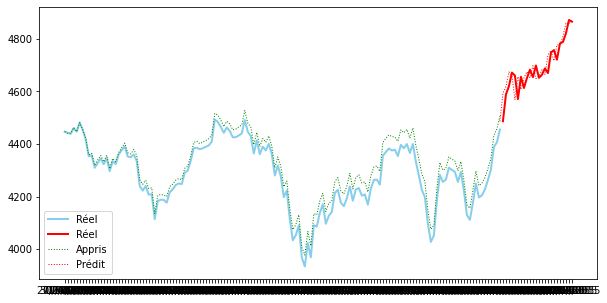

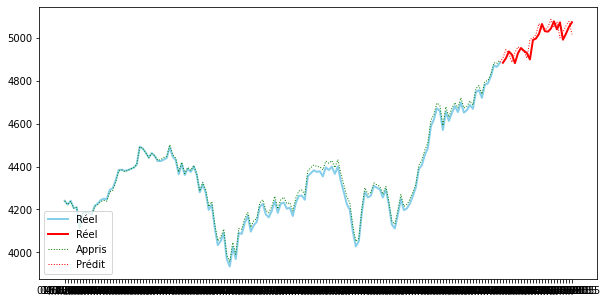

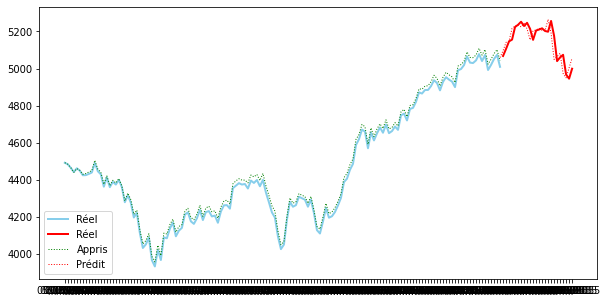

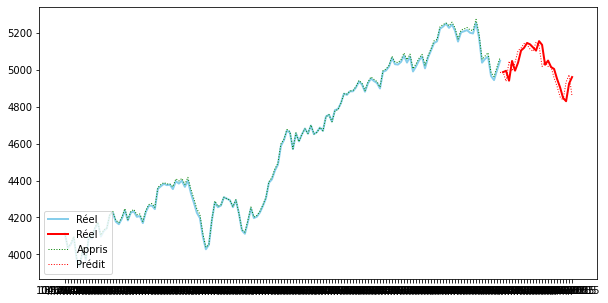

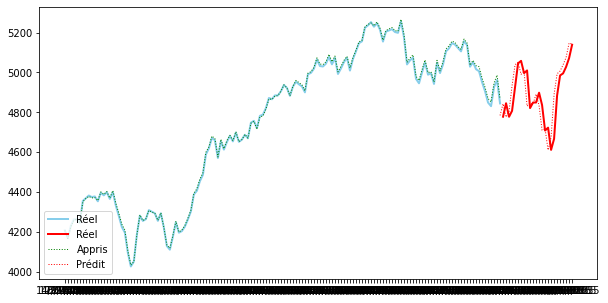

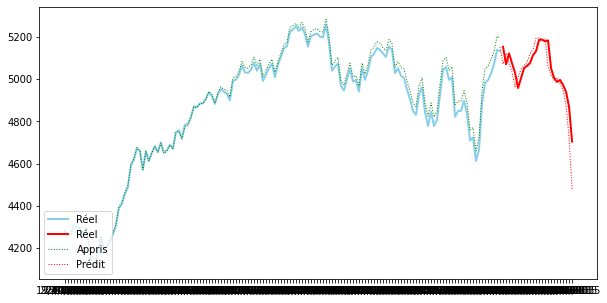

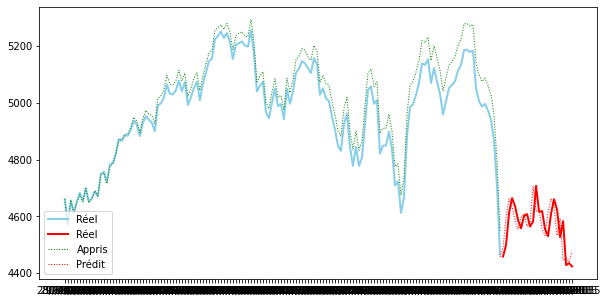

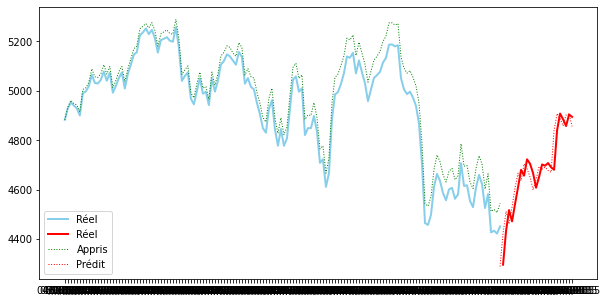

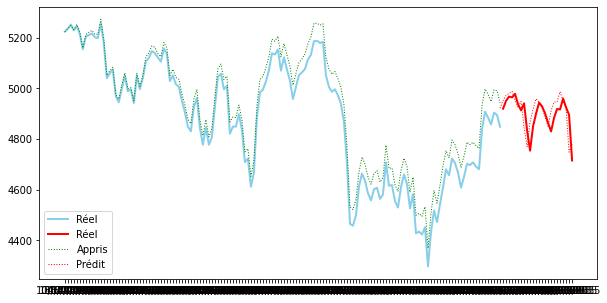

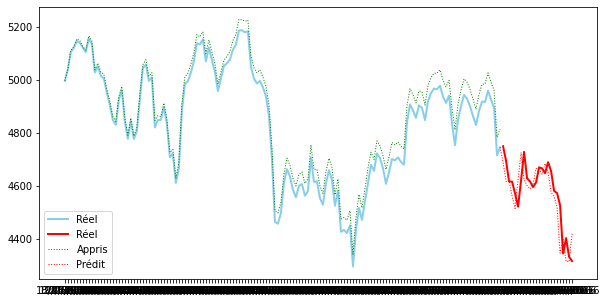

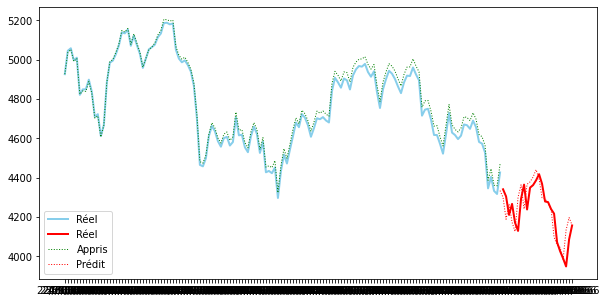

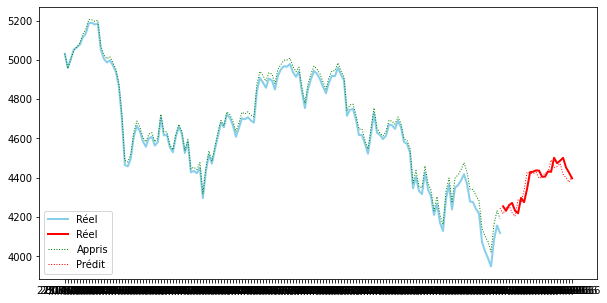

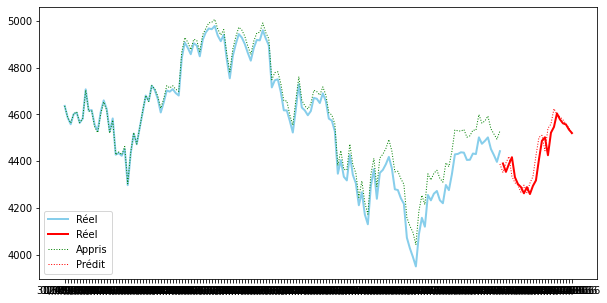

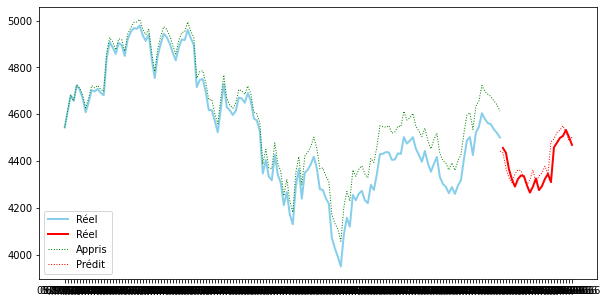

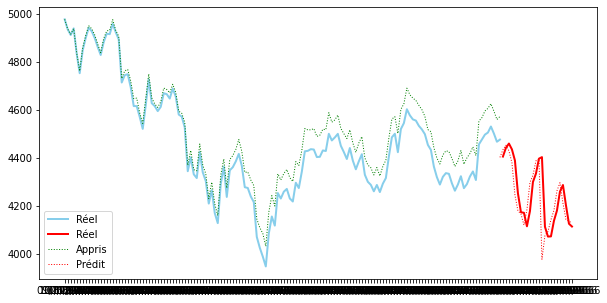

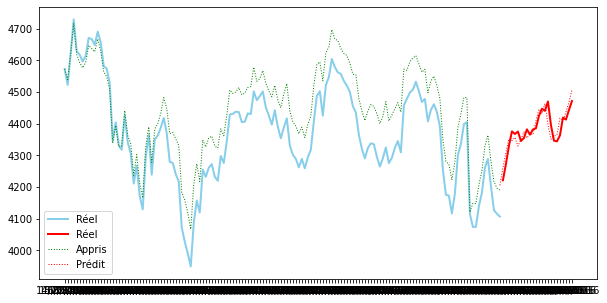

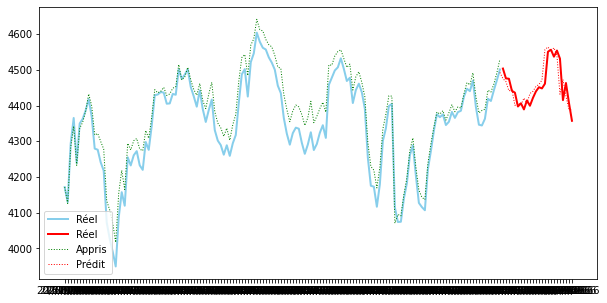

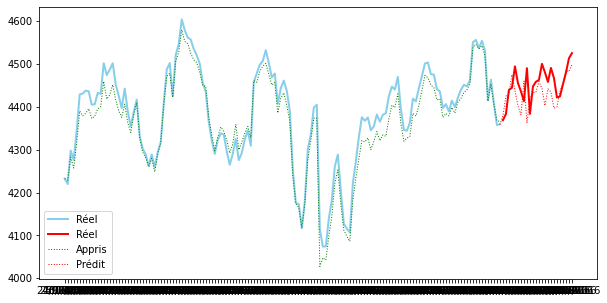

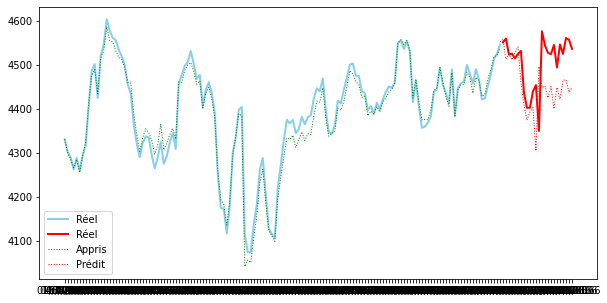

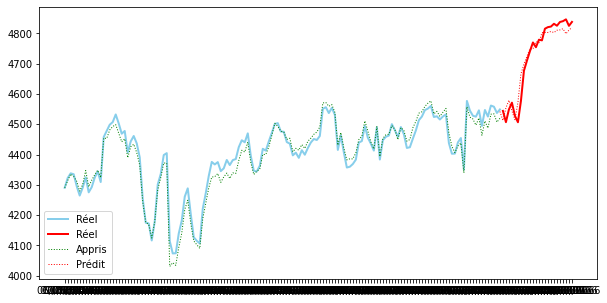

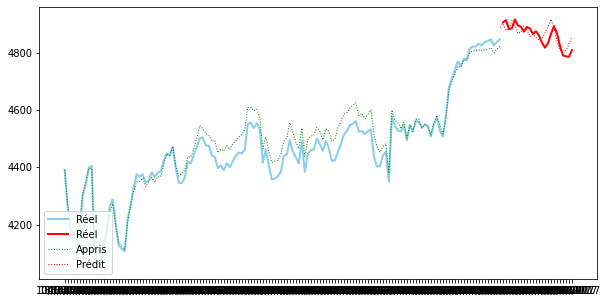

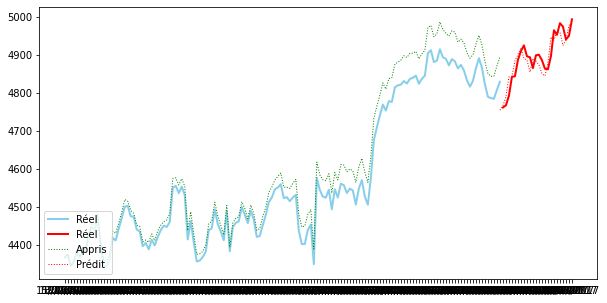

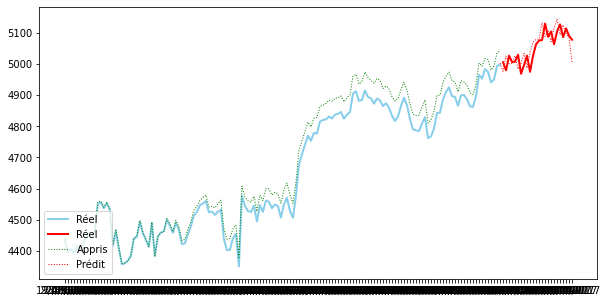

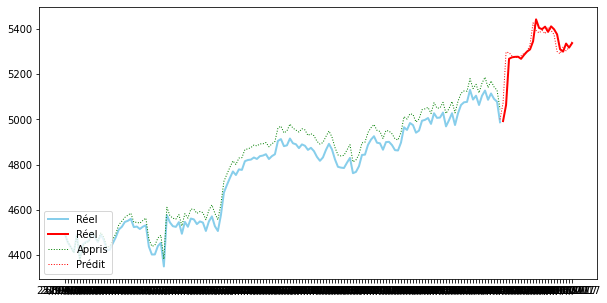

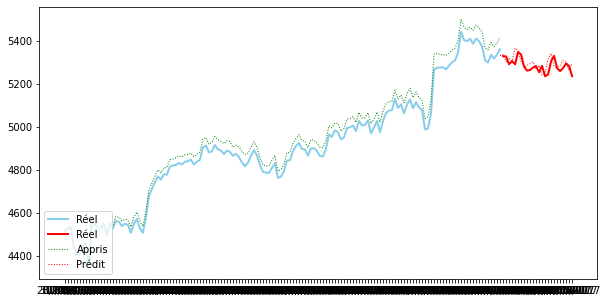

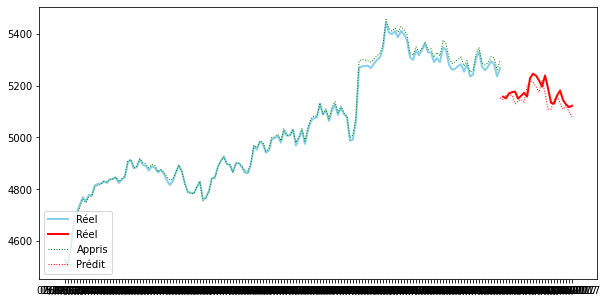

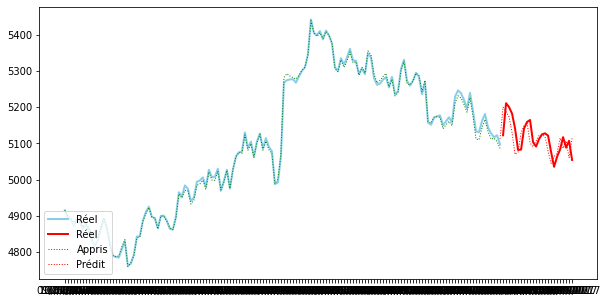

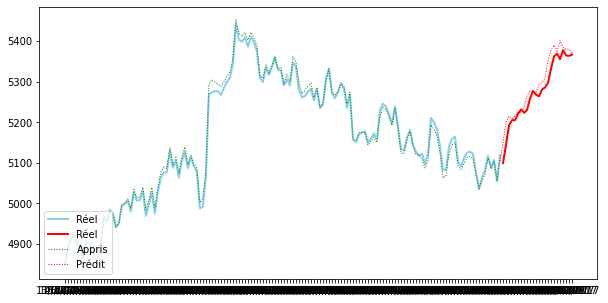

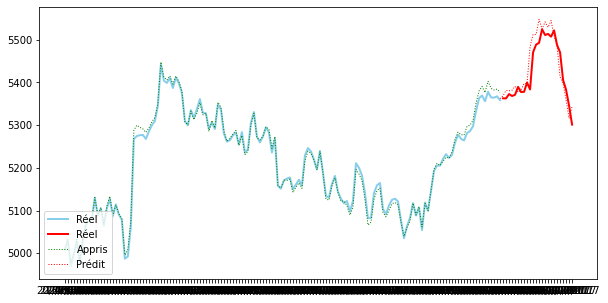

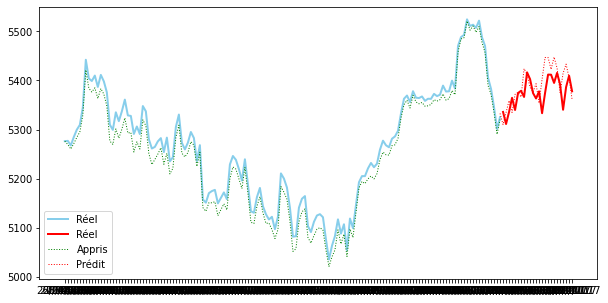

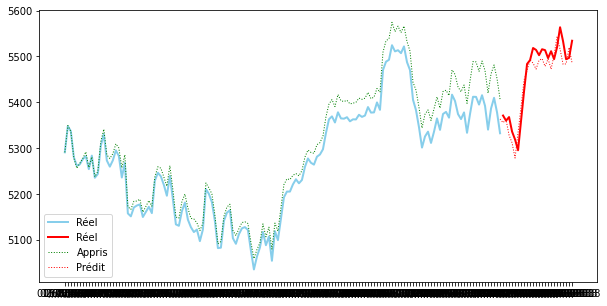

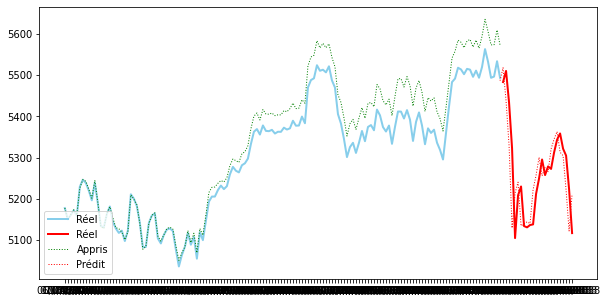

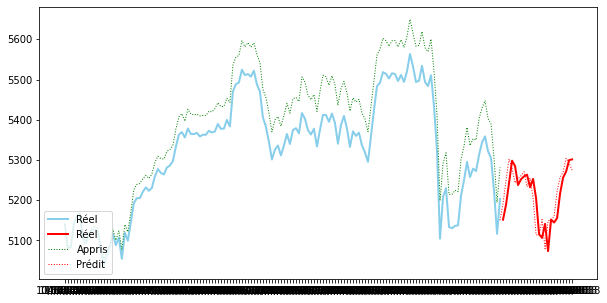

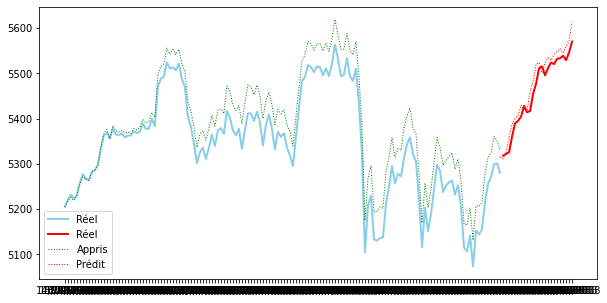

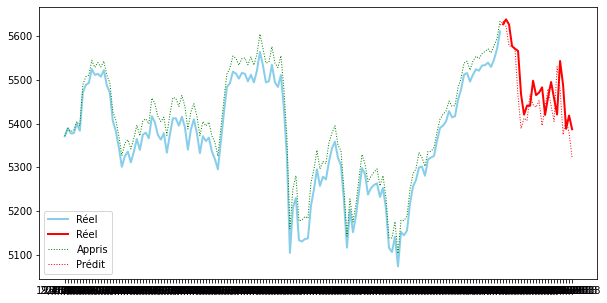

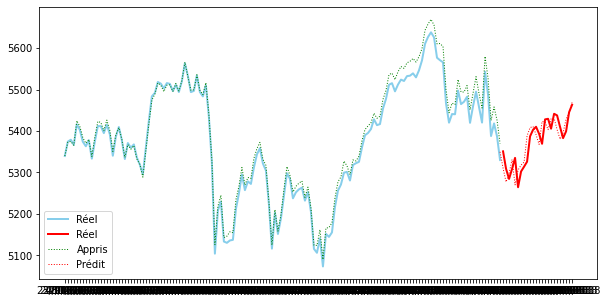

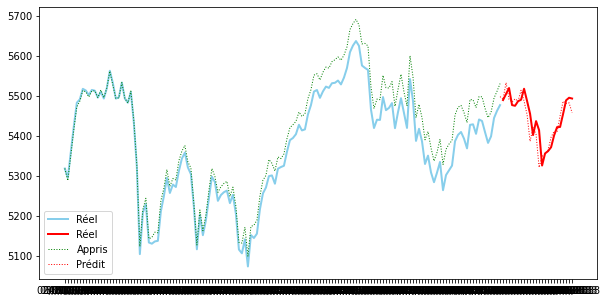

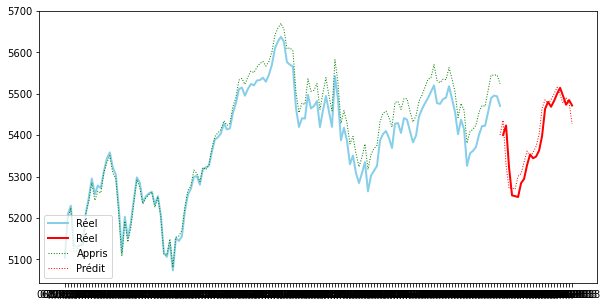

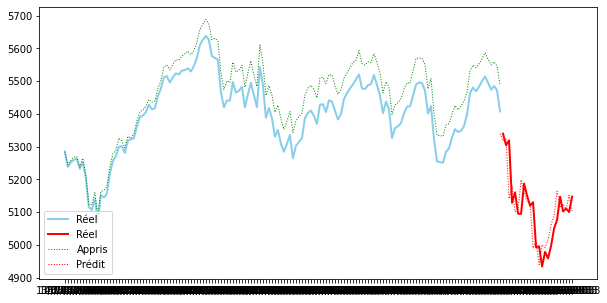

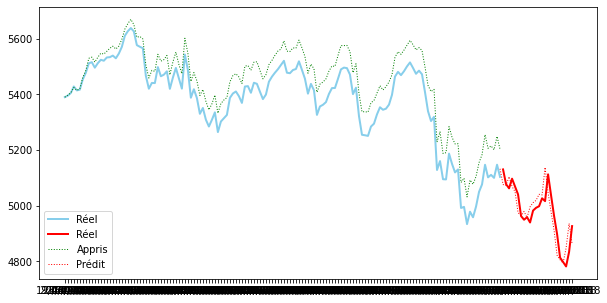

In [0]:
#Regression lineaire avec la selection de variable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.metrics import mean_squared_error

error =[]
betaMatFinal = []

i=0
while i<(len(trainSub)-1):
  print(i)
  # sep = int((selection[i+1] - selection[i])*0.75) + selection[i]
  selectFeatures = betaMat[j,:]>0
  rateCompagniesSelect = rateCompagnies.iloc[:,1:p].loc[:,selectFeatures]
  print(trainSub[i],(trainSub[i+1]+1),testSub[i],(testSub[i+1]+1))
  xTrain = rateCompagniesSelect.iloc[trainSub[i]:(trainSub[i+1]+1), 1:p]
  xTest = rateCompagniesSelect.iloc[testSub[i]:(testSub[i+1]+1), 1:p]
  yTrain = rateCAC.iloc[trainSub[i]:(trainSub[i+1]+1), 1]
  yTest = rateCAC.iloc[testSub[i]:(testSub[i+1]+1), 1]
  print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

  # Modèle linéaire simple coefficients non négatif
  model = OLSnonNeg()
  print(list(yTrain))
  model.fit(np.array(xTrain), list(yTrain))
  yPred = model.predict(np.array(xTest))

  #Transformation return en indice
  yFitted = toIndice(model.predict(np.array(xTrain)), dataCAC40.iloc[trainSub[i], 1])
  yPredCours = toIndice(yPred, dataCAC40.iloc[testSub[i], 1])[1:len(yPred)+1]
  yTestCours = toIndice(list(yTest), dataCAC40.iloc[testSub[i], 1])[1:len(yTest)+1]
  #Calcul erreur
  error.append(mean_squared_error(yTestCours, yPredCours))
  print(model.coef_)

  betaMatFinal.append(model.coef_)

  # multiple line plot
  fig = plt.figure(figsize=(10,5))
  print("Longueur test", len(dataCAC40.iloc[trainSub[i]:testSub[i]+1,:]), len(list(yFitted)), len(dataCAC40.iloc[(testSub[i]+1):(testSub[i+1]+1),:]), len(list(yPredCours)))
  plt.plot('Date', 'Cours', data=dataCAC40.iloc[trainSub[i]:testSub[i]+1,:], color='skyblue', linewidth=2)
  plt.plot('Date', 'Cours', data=dataCAC40.iloc[testSub[i]+1:testSub[i+1]+1,:], color='red', linewidth=2)
  plt.plot(dataCAC40.iloc[trainSub[i]:testSub[i]+1,0], list(yFitted), linewidth=1, linestyle = ':', color = 'green')
  plt.plot(dataCAC40.iloc[testSub[i]:testSub[i+1]+1,0], list(yPredCours), linewidth=1, linestyle = ':', color = 'red')
  plt.legend(['Réel', 'Réel', 'Appris', 'Prédit'], loc='lower left')

  i = i+2
print(error)

## Elastic Net

Validation croisée Elastic-Net

In [0]:
AVG_MSE_ELASTIC_NET=np.zeros(2000) 

In [0]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import itertools
from pprint import pprint
from sklearn.model_selection import cross_validate 

def EN(penalisation, alfa):
    clf = ElasticNet(alpha = penalisation, random_state=42, l1_ratio = alfa,max_iter=10^9, fit_intercept = False, tol = 10**-8, positive = True, copy_X=True)
    return(clf)

#Grille de 2000 valeurs à tester pour alpha et l1_ratio
grid_alpha=np.linspace(0.000001,0.01,100) 
grid_ratio=np.linspace(0,1,20) 
list_param=[list(grid_alpha),list(grid_ratio)]
result = list(itertools.product(*list_param))


In [0]:
xTrain = rateCompagnies.iloc[0:n, 1:p]
yTrain = rateCAC.iloc[0:n, 1]
for i,(a,r) in enumerate(result): 
    #On appel notre model EN avec chaque lambda et ratio
    model = EN(a,r)
    #Validation croisée, l'algo maximise le score d'ou le fait de fournir score= - MSE
    scores = cross_validate(model, stand(xTrain)[1] , yTrain, scoring='neg_mean_squared_error',
                            cv=10, return_train_score=False)
    #On sauvegarde l'erreur moyenne quadratique 
    AVG_MSE_ELASTIC_NET[i]= - np.mean(scores['test_score'])

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.004326580138723085, tolerance: 1.1602292674678793e-09
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0029450538765845857, tolerance: 1.0271578279373669e-09
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003202942025418168, tolerance: 1.059565013523201e-09
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceW

In [0]:
imin=AVG_MSE_ELASTIC_NET.argmin() 
alpha_CV,ratio_CV=result[imin]
print("Le alpha et le ratio retenus par Cross Validation sont :",[alpha_CV,ratio_CV])

Le alpha et le ratio retenus par Cross Validation sont : [0.007778000000000001, 0.10526315789473684]


In [0]:
alpha_CV,ratio_CV = [0.007778000000000001, 0.10526315789473684]

In [0]:
betaMatEN = np.empty(shape=(len(trainSub)//2,p-1))
i=0
while i<(len(trainSub)-1):
  print(i)
  print(trainSub[i],(trainSub[i+1]+1),testSub[i],(testSub[i+1]+1))
  xTrain = rateCompagnies.iloc[trainSub[i]:(trainSub[i+1]+1), 1:p]
  xTest = rateCompagnies.iloc[testSub[i]:(testSub[i+1]+1),1:p]
  yTrain = rateCAC.iloc[trainSub[i]:(trainSub[i+1]+1), 1]
  yTest = rateCAC.iloc[testSub[i]:(testSub[i+1]+1), 1]
  print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)
  model = ElasticNet(alpha=alpha_CV, l1_ratio=ratio_CV, fit_intercept = False, tol = 10**-8, positive = True,)
  model.fit(stand(xTrain)[1], yTrain)

  print(model.coef_)
  j=i//2
  betaMatEN[j,:] = model.coef_
  i = i+2

0
0 145 145 170
(145, 40) (25, 40) (145,) (25,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.07793436e-04
 9.18845283e-04 2.93052443e-04 2.07823424e-03 1.81256834e-04
 8.79716004e-05 0.00000000e+00 1.24571572e-03 9.48601851e-04
 3.27678806e-04 8.52878672e-05 1.89269986e-04 0.00000000e+00
 1.25429299e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.45840893e-04 5.60133153e-04 0.00000000e+00 9.14596261e-04
 0.00000000e+00 4.43266793e-04 2.82927568e-04 0.00000000e+00
 0.00000000e+00 4.93832871e-04 9.19836577e-04 3.94557997e-04
 3.74199356e-04 6.15338933e-04 0.00000000e+00 3.79099074e-04
 0.00000000e+00 0.00000000e+00 5.01238651e-04 0.00000000e+00]
2
25 170 170 195
(145, 40) (25, 40) (145,) (25,)
[0.00000000e+00 0.00000000e+00 0.00000000e+00 2.94045925e-04
 7.77587853e-04 2.25946055e-04 2.17555444e-03 9.01845702e-05
 1.76879502e-04 1.42464088e-04 1.42857256e-03 1.07350096e-03
 4.31469517e-04 0.00000000e+00 2.37672631e-04 0.00000000e+00
 9.25831523e-05 0.00000000e+00 1.12551924e-04 1.

In [0]:
# on regarde combien de features ont été selectionné par l'Elastic Net pour chaque échantillon
(betaMatEN>0).sum(axis=1)

array([24, 28, 28, 27, 27, 28, 25, 26, 29, 25, 25, 25, 25, 26, 25, 18, 18,
       18, 16, 19, 17, 26, 26, 27, 27, 19, 18, 20, 20, 20, 17, 16, 19, 20,
       19, 21, 22, 18, 20, 26])

In [0]:
stats.describe((betaMatEN>0).sum(axis=1))

DescribeResult(nobs=40, minmax=(16, 29), mean=22.5, variance=16.512820512820515, skewness=-0.0545657724110023, kurtosis=-1.5136086570734155)

0
0 145 145 170
(145, 25) (25, 25) (145,) (25,)
[0.01368035 0.05545098 0.12721815 0.0356805  0.03984483 0.01352337
 0.12221722 0.04843503 0.03188068 0.03412633 0.03914093 0.00377849
 0.02162021 0.04557902 0.02496748 0.04398654 0.08104522 0.03642382
 0.02839947 0.04290162 0.01917758 0.01348203 0.0235437  0.00685327
 0.04503201]
Longueur test 146 146 24 25
2
25 170 170 195
(145, 25) (25, 25) (145,) (25,)
[0.01228842 0.04211999 0.12953842 0.04218684 0.04639584 0.02253245
 0.12409622 0.05310846 0.03668588 0.01745559 0.04377703 0.00067972
 0.0330769  0.04915057 0.01921453 0.03514674 0.08376128 0.03059498
 0.02171117 0.03761826 0.02122256 0.01716428 0.02233694 0.00584974
 0.04084882]
Longueur test 146 146 24 25
4
50 195 195 220
(145, 25) (25, 25) (145,) (25,)
[0.01531001 0.05023574 0.12566351 0.0353518  0.03676753 0.01593449
 0.12335398 0.05341712 0.03830174 0.01475528 0.04715069 0.00447774
 0.03664626 0.04070894 0.02108208 0.03507863 0.08468209 0.029124
 0.0248519  0.03590188 0.02650229 0.0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

44
550 695 695 720
(145, 25) (25, 25) (145,) (25,)
[0.02995408 0.06243811 0.1079822  0.05599807 0.00852031 0.01797198
 0.08349709 0.05154409 0.03390505 0.02613474 0.03385276 0.01698915
 0.01396249 0.06831374 0.04858192 0.01977654 0.08834907 0.04176597
 0.03726298 0.02081757 0.03412241 0.03888871 0.01835088 0.
 0.04970676]
Longueur test 146 146 24 25
46
575 720 720 745
(145, 25) (25, 25) (145,) (25,)
[0.03011726 0.06186028 0.101244   0.05645681 0.0093692  0.01955095
 0.08169741 0.04920215 0.03687749 0.02747728 0.04681899 0.01597662
 0.01461854 0.06726436 0.0410904  0.02158119 0.0893646  0.04157743
 0.03750945 0.02311218 0.03279642 0.0398237  0.0225351  0.00051242
 0.04956442]
Longueur test 146 146 24 25
48
600 745 745 770
(145, 25) (25, 25) (145,) (25,)
[0.04634938 0.08581292 0.1064147  0.05603345 0.00917714 0.01575443
 0.08353032 0.04608517 0.02940484 0.02502562 0.06446175 0.02673908
 0.01435028 0.05663533 0.03782757 0.02417185 0.08312214 0.03900313
 0.0391993  0.01706446 0.02056047 0.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

50
625 770 770 795
(145, 25) (25, 25) (145,) (25,)
[0.03727913 0.08026039 0.10213411 0.07312286 0.00687121 0.00499211
 0.08174451 0.04916644 0.02073012 0.00783665 0.07498323 0.04079437
 0.01786643 0.05541102 0.0357148  0.01770938 0.08732755 0.03337717
 0.04003181 0.01837329 0.         0.02776532 0.02397426 0.00415018
 0.05252003]
Longueur test 146 146 24 25
52
650 795 795 820
(145, 25) (25, 25) (145,) (25,)
[0.03104396 0.08720598 0.08063428 0.06872972 0.01133475 0.00699172
 0.08214279 0.03823393 0.02016932 0.         0.07084484 0.03338978
 0.01600925 0.07287842 0.01363746 0.0142294  0.09398089 0.03155957
 0.05717161 0.01968019 0.00793054 0.02548484 0.0208677  0.00463412
 0.06190355]
Longueur test 146 146 24 25
54
675 820 820 845
(145, 25) (25, 25) (145,) (25,)
[0.02452893 0.09279996 0.07770297 0.05015871 0.01143116 0.02437932
 0.08019156 0.02898631 0.02900308 0.         0.07882062 0.02332743
 0.03849326 0.06371027 0.00428025 0.00946609 0.09509389 0.03111978
 0.064728   0.02865938 0.013

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

870
(145, 25) (25, 25) (145,) (25,)
[0.02665085 0.08522633 0.07564868 0.06983918 0.00923381 0.02848652
 0.08103485 0.02857173 0.02817657 0.         0.0861284  0.01842919
 0.03650781 0.05977183 0.00308957 0.00750439 0.09957493 0.02792993
 0.06557953 0.01888334 0.01481019 0.01957925 0.0209462  0.00600491
 0.05892616]
Longueur test 146 146 24 25
58
725 870 870 895
(145, 25) (25, 25) (145,) (25,)
[0.0234322  0.09321575 0.07590729 0.0623879  0.01379572 0.02488883
 0.06512516 0.04694163 0.02655306 0.01278463 0.07688651 0.00807658
 0.03899519 0.06823686 0.02087287 0.01115687 0.10258721 0.02281805
 0.05232365 0.02429497 0.00949827 0.02649677 0.01773393 0.
 0.04893408]
Longueur test 146 146 24 25
60
750 895 895 920
(145, 25) (25, 25) (145,) (25,)
[0.01963779 0.08521022 0.0730965  0.05967693 0.0113873  0.02213634
 0.06946531 0.0615368  0.02023559 0.01127814 0.07826061 0.01036882
 0.03576281 0.07961734 0.02397549 0.01318506 0.09638028 0.02018176
 0.04145167 0.02665487 0.01533162 0.02962677 0.0200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

64
800 945 945 970
(145, 25) (25, 25) (145,) (25,)
[0.01840683 0.08271921 0.12086898 0.04611674 0.00328807 0.01191858
 0.05390398 0.06016431 0.03523144 0.02595575 0.06870161 0.01323674
 0.01627439 0.06508838 0.06059536 0.01976323 0.113626   0.02491832
 0.01441033 0.03520232 0.0292746  0.01881463 0.01929394 0.00559357
 0.04722201]
Longueur test 146 146 24 25
66
825 970 970 995
(145, 25) (25, 25) (145,) (25,)
[0.01818519 0.07336923 0.114118   0.05595381 0.00473181 0.01471256
 0.04777877 0.05476452 0.03590246 0.03138702 0.05982205 0.0110274
 0.01897341 0.06740111 0.06471733 0.03178537 0.12152157 0.01421233
 0.01452285 0.03233736 0.02272535 0.01408552 0.02025252 0.01190628
 0.04821123]
Longueur test 146 146 24 25
68
850 995 995 1020
(145, 25) (25, 25) (145,) (25,)
[0.02344113 0.09045755 0.10602992 0.03416123 0.01316705 0.00653223
 0.05527551 0.05280423 0.03275835 0.03801812 0.06422958 0.00740709
 0.02100562 0.06439193 0.05704116 0.03809835 0.12844076 0.01240315
 0.01987504 0.03817895 0.011

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

76
950 1095 1095 1120
(145, 25) (25, 25) (145,) (25,)
[0.01630795 0.08531631 0.10160142 0.05439318 0.01339156 0.01914317
 0.04847025 0.03252823 0.04459318 0.01088405 0.09735826 0.00170439
 0.01821911 0.03251217 0.04987264 0.04312041 0.06727039 0.0293742
 0.03388884 0.00324804 0.04343565 0.02139238 0.01598989 0.01589444
 0.05802953]
Longueur test 146 146 24 25
78
975 1120 1120 1145
(145, 25) (25, 25) (145,) (25,)
[0.01256996 0.07969728 0.09336254 0.05189575 0.00956402 0.01782134
 0.04719685 0.05286605 0.03285675 0.03102843 0.10370882 0.01383171
 0.00662161 0.02998021 0.07131886 0.04400199 0.05004714 0.02111887
 0.01353731 0.01377874 0.02370457 0.02521988 0.02257769 0.01655977
 0.07069489]
Longueur test 146 146 24 25
[19.550220397211806, 26.956502043519418, 36.82274041975151, 170.1401510974139, 28.3578385858396, 143.77731077446103, 179.404902444149, 152.69031700033062, 44.48219086369811, 40.507517387531585, 479.03646456870064, 158.35684410180204, 170.11727936686853, 727.1631317333485, 90

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


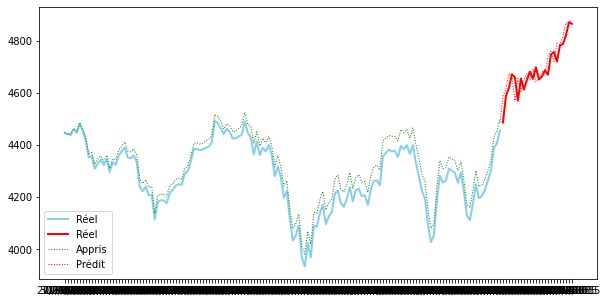

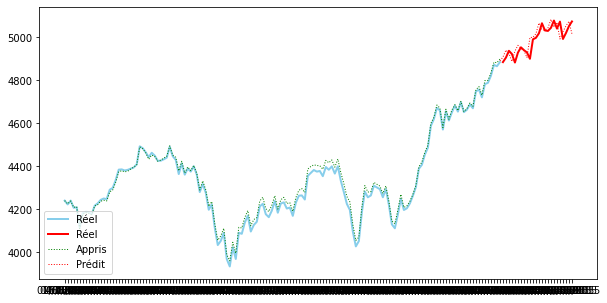

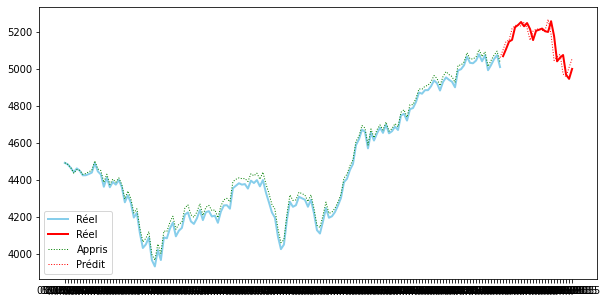

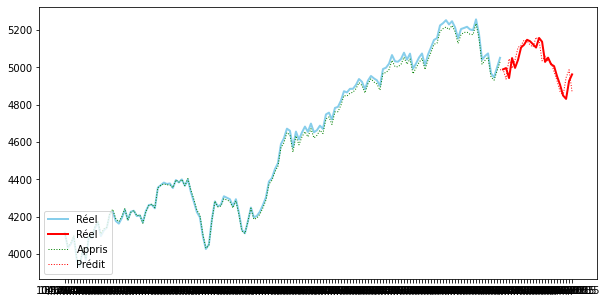

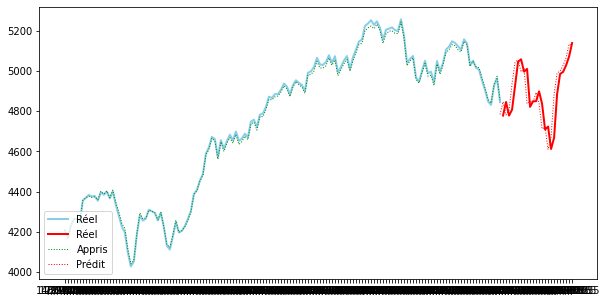

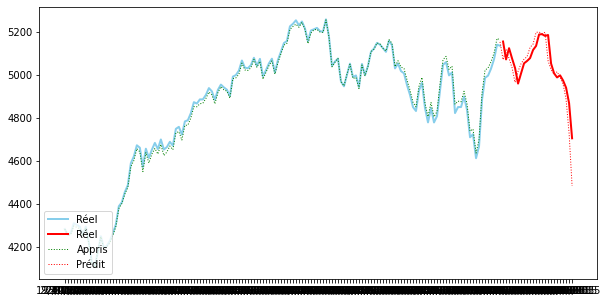

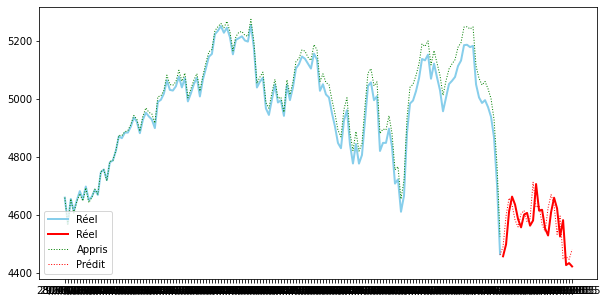

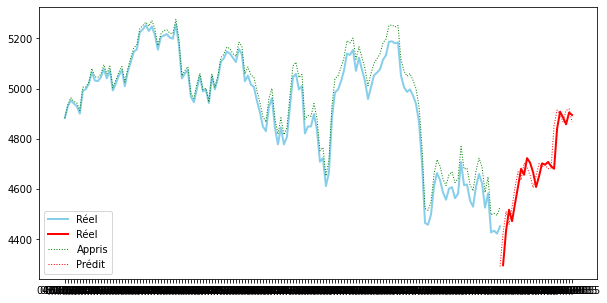

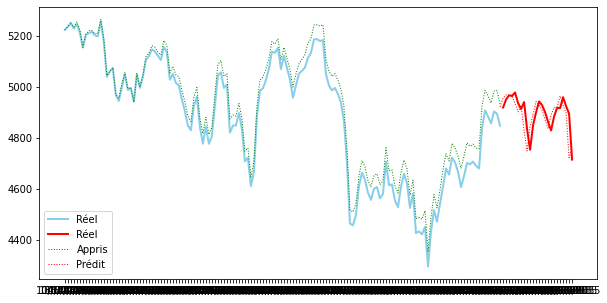

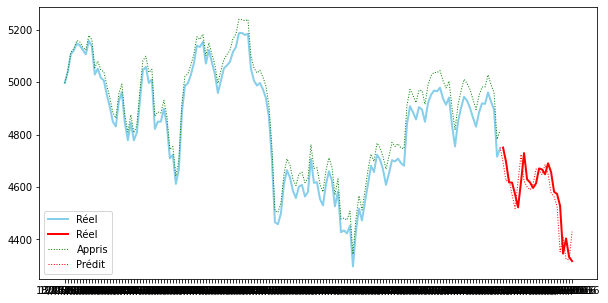

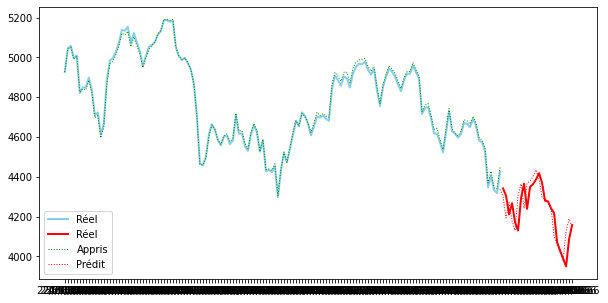

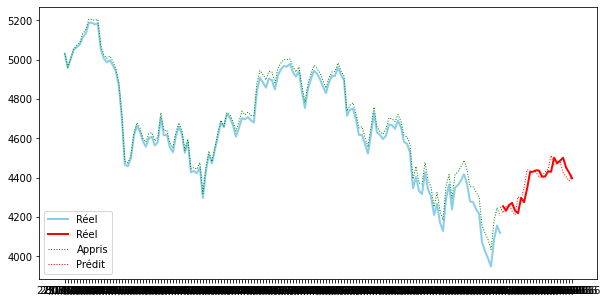

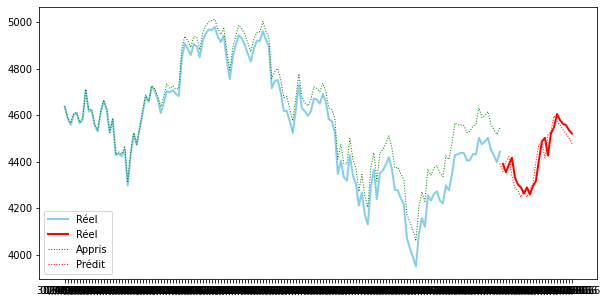

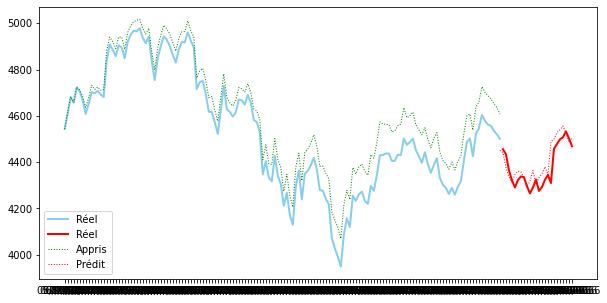

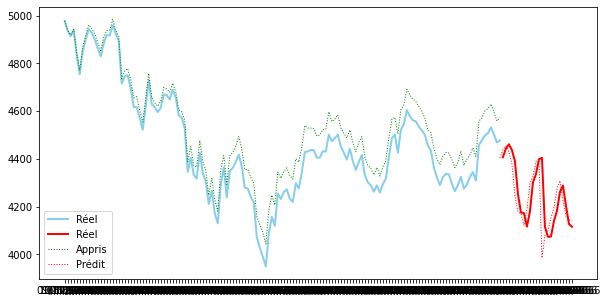

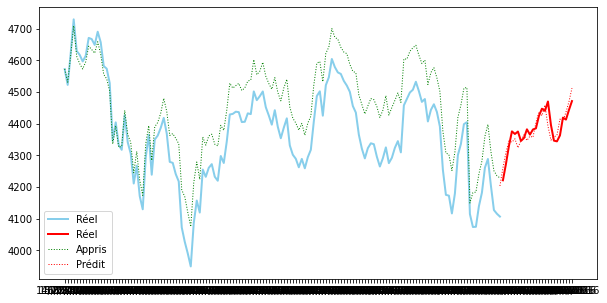

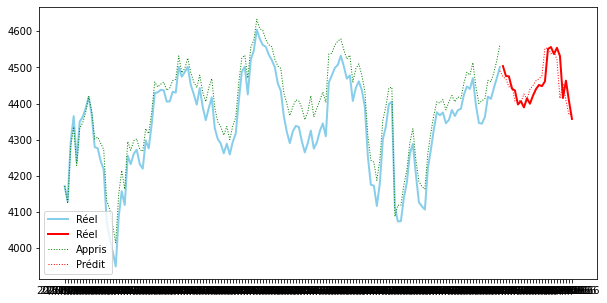

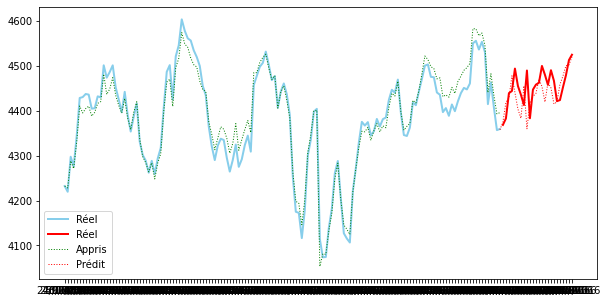

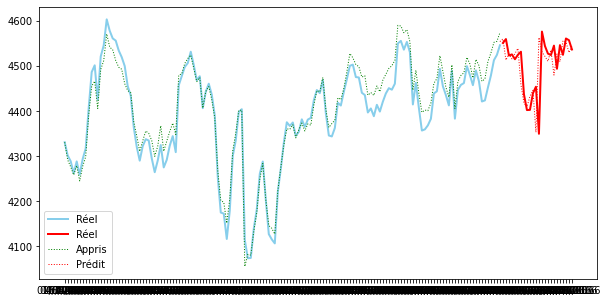

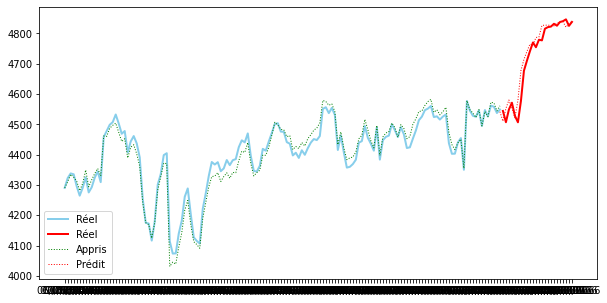

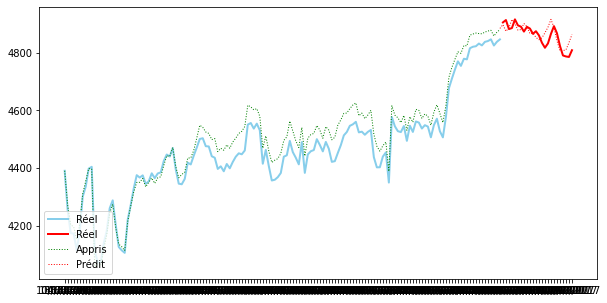

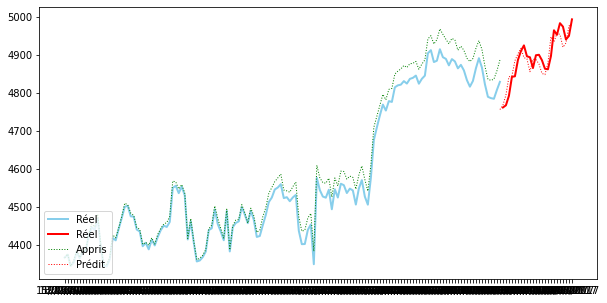

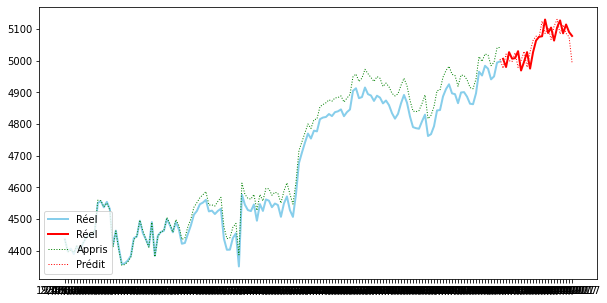

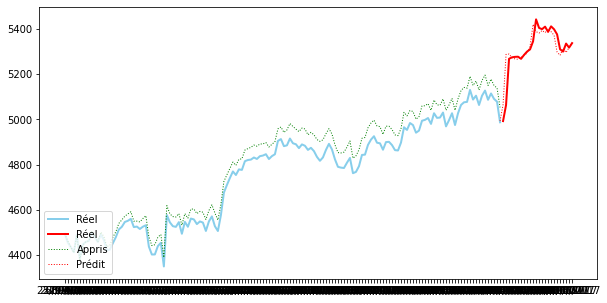

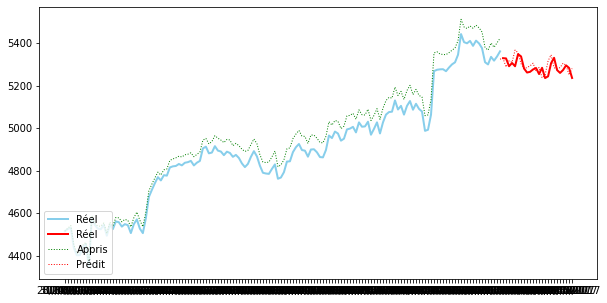

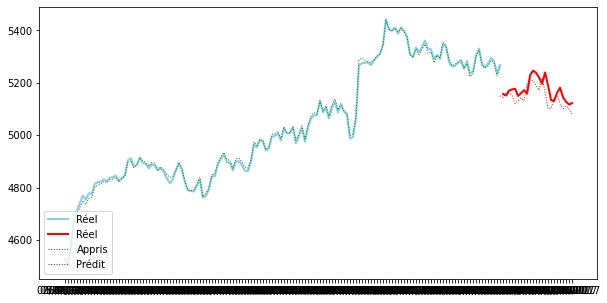

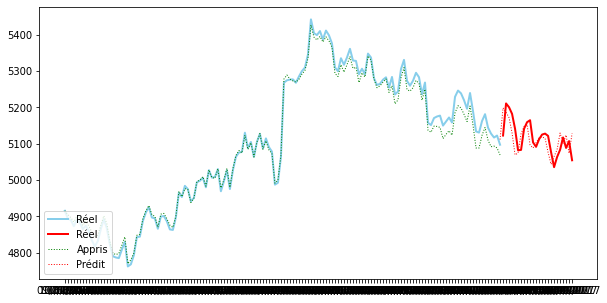

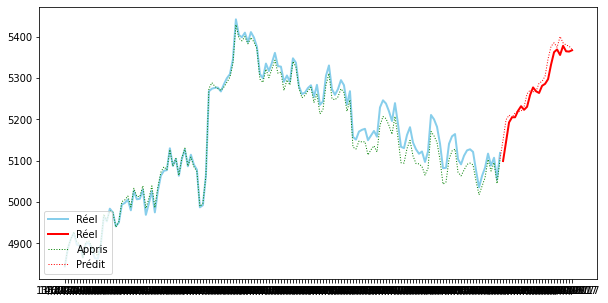

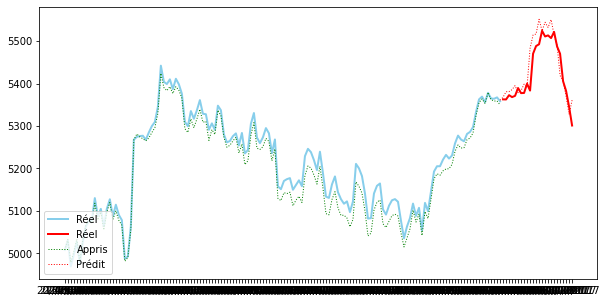

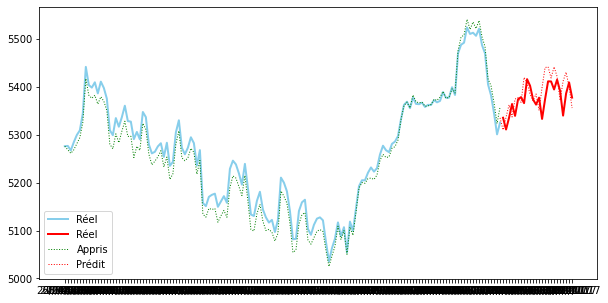

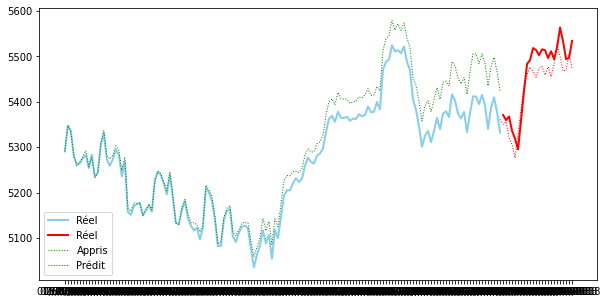

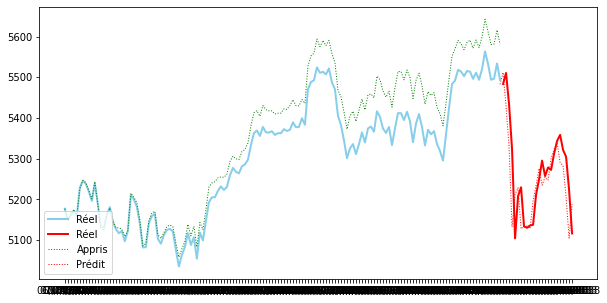

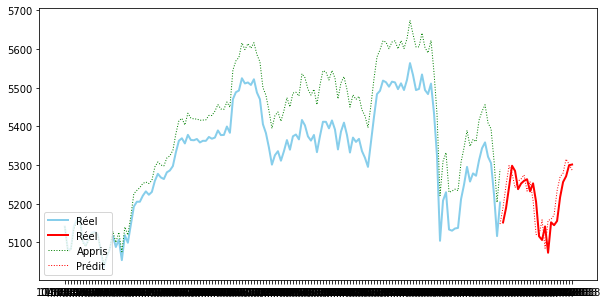

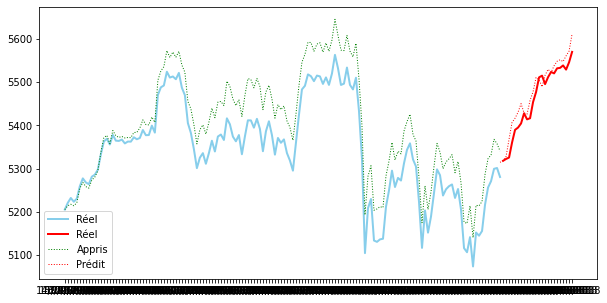

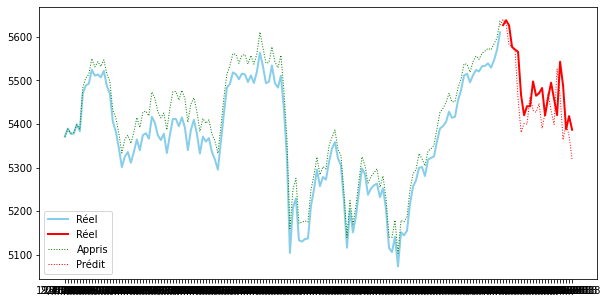

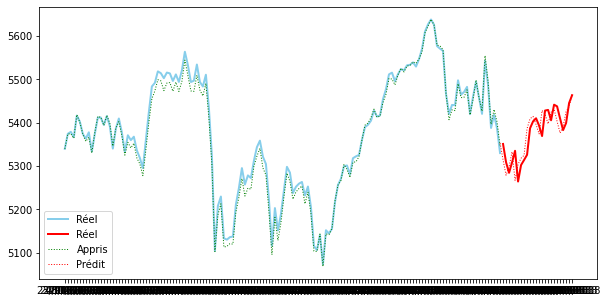

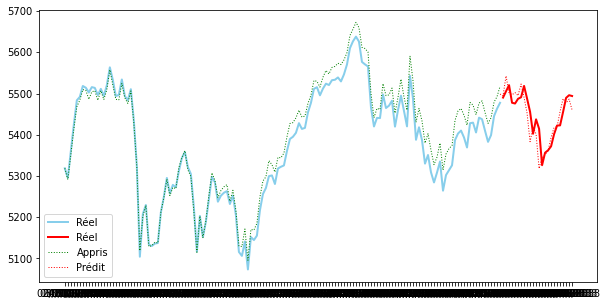

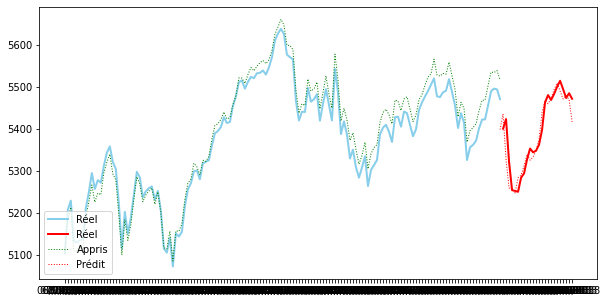

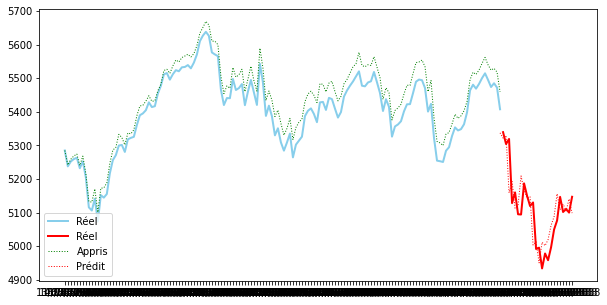

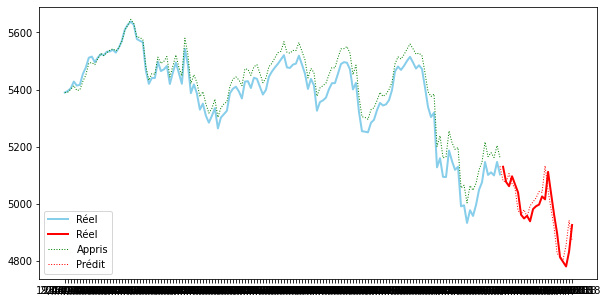

In [0]:
#Regression lineaire avec la selection de variable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error
errorEN =[]
betaMatENFinal = []

i=0
while i<(len(trainSub)-1):
  print(i)  
  selectFeatures = betaMatEN[j,:]>0
  rateCompagniesSelectEN = rateCompagnies.iloc[:,1:p].loc[:,selectFeatures]
  print(trainSub[i],(trainSub[i+1]+1),testSub[i],(testSub[i+1]+1))
  xTrain = rateCompagniesSelectEN.iloc[trainSub[i]:(trainSub[i+1]+1), 1:p]
  xTest = rateCompagniesSelectEN.iloc[testSub[i]:(testSub[i+1]+1), 1:p]
  yTrain = rateCAC.iloc[trainSub[i]:(trainSub[i+1]+1), 1]
  yTest = rateCAC.iloc[testSub[i]:(testSub[i+1]+1), 1]
  print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

  # Modèle linéaire simple avec coeffcients non négatifs
  model = OLSnonNeg()
  model.fit(np.array(xTrain), list(yTrain))
  yPred = model.predict(np.array(xTest))

  # Transformation return en indice
  yFitted = toIndice(model.predict(np.array(xTrain)), dataCAC40.iloc[trainSub[i], 1])
  yPredCours = toIndice(yPred, dataCAC40.iloc[testSub[i], 1])[1:len(yPred)+1]
  yTestCours = toIndice(list(yTest), dataCAC40.iloc[testSub[i], 1])[1:len(yTest)+1]
  # Calcul erreur
  errorEN.append(mean_squared_error(yTestCours, yPredCours))

  print(model.coef_)
  betaMatENFinal.append(model.coef_)

  # multiple line plot
  fig = plt.figure(figsize=(10,5))
  print("Longueur test", len(dataCAC40.iloc[trainSub[i]:testSub[i]+1,:]), len(list(yFitted)), len(dataCAC40.iloc[(testSub[i]+1):(testSub[i+1]+1),:]), len(list(yPredCours)))
  plt.plot('Date', 'Cours', data=dataCAC40.iloc[trainSub[i]:testSub[i]+1,:], color='skyblue', linewidth=2)
  plt.plot('Date', 'Cours', data=dataCAC40.iloc[testSub[i]+1:testSub[i+1]+1,:], color='red', linewidth=2)
  plt.plot(dataCAC40.iloc[trainSub[i]:testSub[i]+1,0], list(yFitted), linewidth=1, linestyle = ':', color = 'green')
  plt.plot(dataCAC40.iloc[testSub[i]:testSub[i+1]+1,0], list(yPredCours), linewidth=1, linestyle = ':', color = 'red')
  plt.legend(['Réel', 'Réel', 'Appris', 'Prédit'], loc='lower left')

  i = i+2
print(errorEN)

## Test régression linéaire simple

0
0 145 145 170
(145, 40) (25, 40) (145,) (25,)
[0.01593528 0.00897616 0.         0.01992142 0.05709662 0.00557123
 0.12289596 0.03280762 0.01664133 0.01553134 0.11854421 0.03394808
 0.03502587 0.02166584 0.03312613 0.         0.01800471 0.
 0.02484633 0.         0.0155728  0.03650453 0.00700769 0.02273602
 0.00583377 0.02307857 0.02810862 0.0187683  0.01129628 0.01680173
 0.06250209 0.02449154 0.03324572 0.03426284 0.00975103 0.01763396
 0.01661843 0.00446736 0.03506591 0.        ]
Longueur test 146 146 24 25
2
25 170 170 195
(145, 40) (25, 40) (145,) (25,)
[0.00963435 0.00668424 0.00146974 0.01525122 0.04125588 0.01024648
 0.12273981 0.03283663 0.02096726 0.01955703 0.12005605 0.03745444
 0.04398409 0.01446079 0.03523912 0.         0.01700702 0.00073813
 0.02809006 0.00539825 0.02825457 0.03456145 0.00477237 0.02628984
 0.00490792 0.02064939 0.03219711 0.01869763 0.00561789 0.01698241
 0.06430516 0.01658268 0.02863942 0.03094681 0.0095576  0.02171176
 0.01591939 0.00224047 0.03380441

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

46
575 720 720 745
(145, 40) (25, 40) (145,) (25,)
[0.0029996  0.01936081 0.02370272 0.02857545 0.04205351 0.0130169
 0.09942523 0.05265957 0.00951681 0.00501539 0.07864499 0.04092342
 0.02953392 0.02028884 0.03540785 0.00851104 0.02285631 0.
 0.00748738 0.00976576 0.00880131 0.05931419 0.00062461 0.00644239
 0.01669089 0.03435756 0.0231298  0.01530536 0.         0.02371914
 0.0727584  0.02618563 0.03966732 0.01900936 0.02580088 0.0391593
 0.02034268 0.         0.0413095  0.00052062]
Longueur test 146 146 24 25
48
600 745 745 770
(145, 40) (25, 40) (145,) (25,)
[0.         0.02585433 0.01573505 0.03090075 0.06366824 0.0170233
 0.10226869 0.0514663  0.00347953 0.00613757 0.08568836 0.04518456
 0.02865939 0.02488212 0.04787177 0.02283255 0.01385736 0.
 0.01452808 0.01046528 0.01123032 0.04271559 0.00759768 0.02373635
 0.02510396 0.02179984 0.02333169 0.00469878 0.         0.02341875
 0.06444817 0.02569191 0.03421289 0.01438382 0.00989474 0.01391309
 0.01819754 0.00086141 0.04609326 0.   

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

52
650 795 795 820
(145, 40) (25, 40) (145,) (25,)
[0.         0.02184915 0.00050914 0.01161916 0.07949177 0.01749182
 0.07883698 0.05992994 0.01096287 0.00834275 0.08081586 0.03674314
 0.02403589 0.         0.06171582 0.032672   0.01594164 0.
 0.00691378 0.0154275  0.01278561 0.0676691  0.00777692 0.00780835
 0.01938128 0.00551162 0.01500766 0.00753413 0.         0.00801529
 0.08314389 0.01838601 0.04416534 0.01583933 0.01075146 0.02439873
 0.01720506 0.00118901 0.05280152 0.00850316]
Longueur test 146 146 24 25
54
675 820 820 845
(145, 40) (25, 40) (145,) (25,)
[0.         0.01269291 0.01814921 0.         0.08691599 0.01350364
 0.07736983 0.04132179 0.00776582 0.02711111 0.0747495  0.02256257
 0.02051281 0.         0.06723779 0.02606471 0.01286904 0.00717255
 0.00695711 0.01963364 0.04400797 0.05711654 0.         0.01566918
 0.01919765 0.         0.01437482 0.00790753 0.         0.00474664
 0.08794333 0.01603365 0.05288661 0.02781046 0.01136736 0.02197212
 0.02088741 0.         0.048

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

 895
(145, 40) (25, 40) (145,) (25,)
[0.00655113 0.01013613 0.00951157 0.         0.07915792 0.01130124
 0.07319316 0.05757421 0.01189704 0.02018333 0.06630447 0.0384389
 0.01653975 0.00411146 0.06524558 0.01261624 0.02549778 0.
 0.00092882 0.0189241  0.03871198 0.06707281 0.00642716 0.01497403
 0.00920282 0.02278502 0.01691904 0.01295926 0.         0.0174158
 0.08133626 0.00429689 0.0422939  0.02878183 0.01985579 0.02903834
 0.0171648  0.         0.04080413 0.00760987]
Longueur test 146 146 24 25
60
750 895 895 920
(145, 40) (25, 40) (145,) (25,)
[0.0016998  0.01497289 0.01499713 0.         0.07588033 0.01062585
 0.07298794 0.05845577 0.00820045 0.01379856 0.0684915  0.05160925
 0.00913105 0.00386161 0.06620371 0.01019939 0.01467029 0.00707413
 0.01027207 0.01728139 0.03797594 0.07686586 0.         0.01620643
 0.00401472 0.0240593  0.01538557 0.01963853 0.         0.00363079
 0.09414201 0.00670508 0.03393442 0.03307107 0.01782473 0.02278386
 0.01894112 0.00105933 0.04347701 0.00320367

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

66
825 970 970 995
(145, 40) (25, 40) (145,) (25,)
[0.02352262 0.00498668 0.         0.02260825 0.04903285 0.02575372
 0.10352874 0.0492031  0.         0.00156631 0.06456227 0.05002787
 0.02419753 0.02034576 0.0490994  0.00605021 0.0321199  0.01487737
 0.01646427 0.01185094 0.02237681 0.04812045 0.0152776  0.02721139
 0.01604589 0.04203223 0.02797431 0.01450528 0.         0.0141452
 0.07168603 0.00999397 0.01282981 0.03265176 0.01668752 0.01038112
 0.01248621 0.01284315 0.03762404 0.00289145]
Longueur test 146 146 24 25
68
850 995 995 1020
(145, 40) (25, 40) (145,) (25,)
[0.01324007 0.01913656 0.00146773 0.02060812 0.05631327 0.02822571
 0.09591471 0.03407629 0.00153336 0.         0.06480952 0.05081872
 0.02215094 0.02509751 0.05362382 0.00575123 0.02940155 0.01513112
 0.01951137 0.01108299 0.02178551 0.04567597 0.01668753 0.02258425
 0.01004083 0.03866348 0.02908146 0.01174129 0.         0.00938363
 0.08944711 0.01158954 0.02129819 0.03431549 0.01163798 0.01078404
 0.01221177 0.012882

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

72
900 1045 1045 1070
(145, 40) (25, 40) (145,) (25,)
[0.02746363 0.02539411 0.01198007 0.0433692  0.04456213 0.00678237
 0.10840767 0.04321756 0.01254877 0.00051188 0.06946608 0.0387397
 0.0263168  0.03045355 0.05991805 0.00606534 0.02845579 0.
 0.01884318 0.01216175 0.00165991 0.03541554 0.01471971 0.01068591
 0.00288078 0.0415794  0.01735371 0.01408143 0.00146285 0.00583111
 0.0755513  0.01703882 0.03354931 0.01636031 0.01689651 0.01338612
 0.01758396 0.01581507 0.04367623 0.00026893]
Longueur test 146 146 24 25
74
925 1070 1070 1095
(145, 40) (25, 40) (145,) (25,)
[0.02707285 0.01642292 0.00333637 0.0427448  0.05590682 0.00465561
 0.10314539 0.04234671 0.01334837 0.00097638 0.04940079 0.04159998
 0.03570051 0.01044682 0.07419008 0.         0.02723222 0.
 0.01794175 0.0084141  0.00289698 0.03109802 0.01494732 0.006035
 0.00418575 0.04562386 0.03262211 0.0120918  0.00542515 0.00433006
 0.0571957  0.01657162 0.03752609 0.0098425  0.03007376 0.01390948
 0.01546788 0.00886478 0.04891579

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


(145, 40) (25, 40) (145,) (25,)
[0.03069968 0.01196185 0.00746685 0.0217142  0.06783109 0.00786047
 0.10797352 0.04669725 0.01188124 0.         0.05157731 0.03795083
 0.03704783 0.02440216 0.06604435 0.01091445 0.02424558 0.
 0.02904549 0.         0.00019056 0.022608   0.00554138 0.00029644
 0.01126275 0.06594362 0.04240432 0.00987876 0.00214186 0.02280574
 0.02873021 0.01134143 0.01800335 0.00731553 0.02682333 0.03040448
 0.01730774 0.0085092  0.06525641 0.00087538]
Longueur test 146 146 24 25
[139.98041781217236, 12.278774209361025, 53.95946089648929, 67.73136018372753, 50.167829634645926, 91.90338063056748, 32.506131773934946, 59.77514017210212, 208.2533989712881, 37.71110497858963, 308.2515412878619, 177.91482441996038, 44.701189324545275, 231.04770734607163, 968.431838058811, 138.58747835337235, 115.05439091074412, 885.1197613714546, 2426.002958818023, 347.6622320527397, 639.4144370360476, 107.7114066488811, 62.939520469331775, 162.83529755929428, 271.09158882744185, 295.718587124

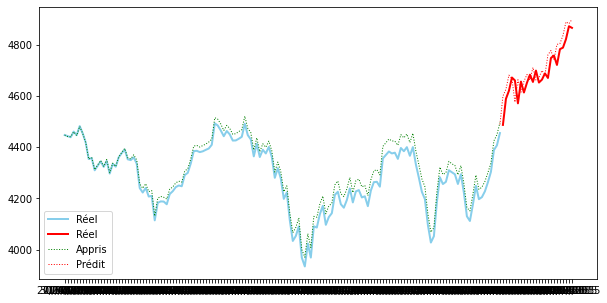

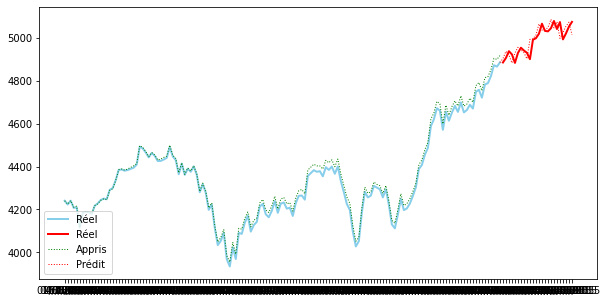

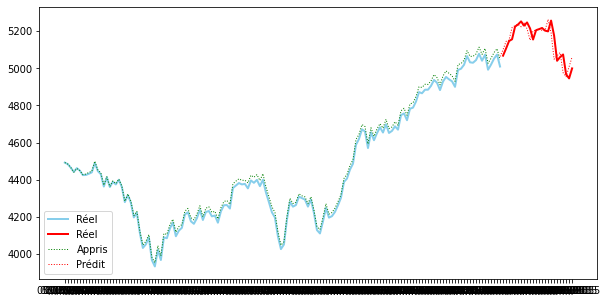

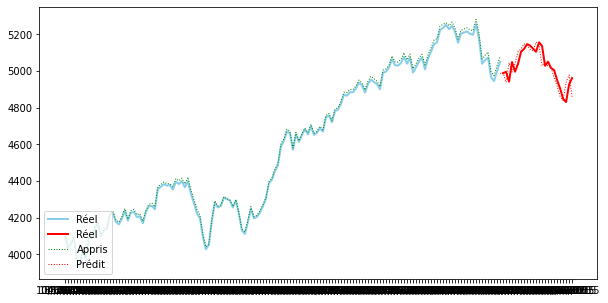

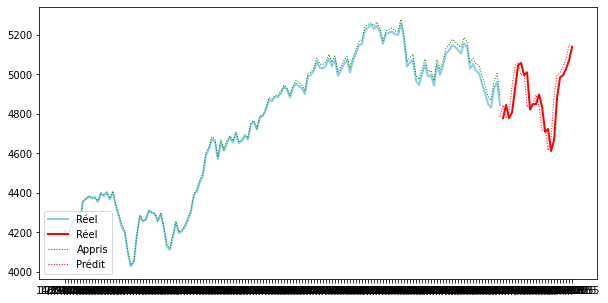

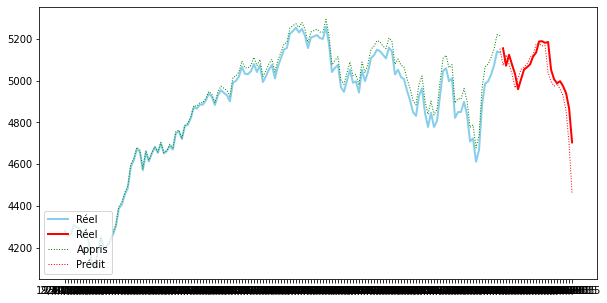

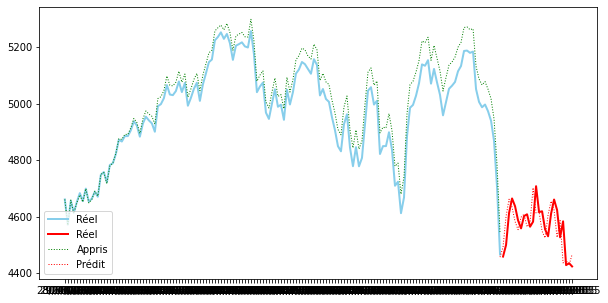

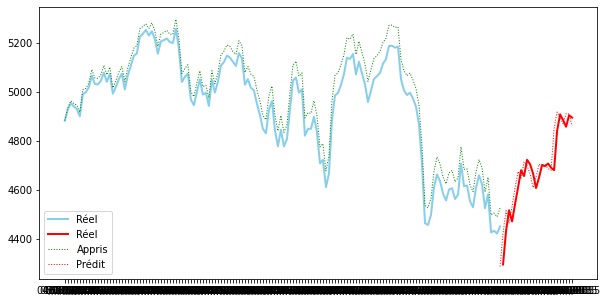

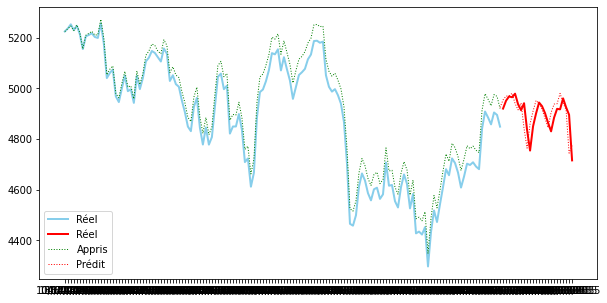

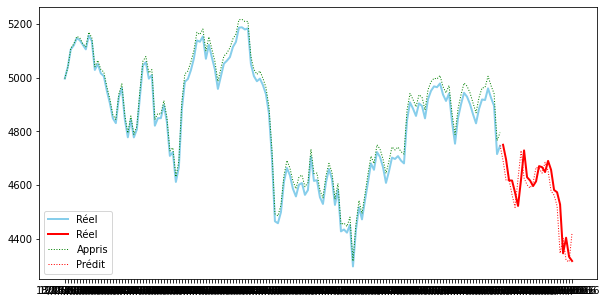

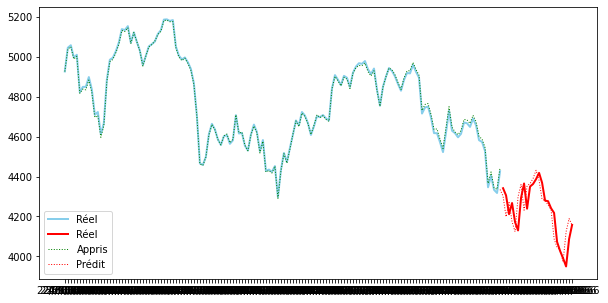

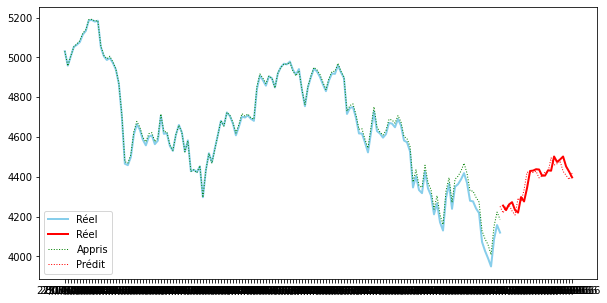

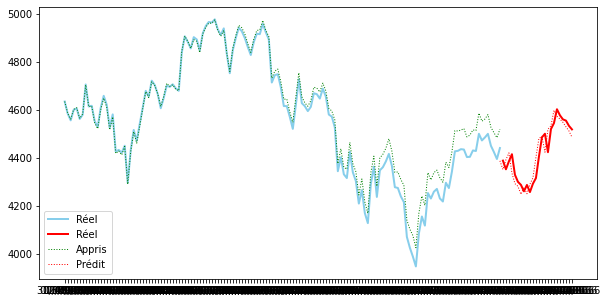

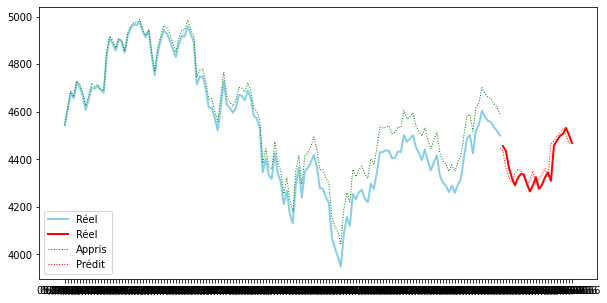

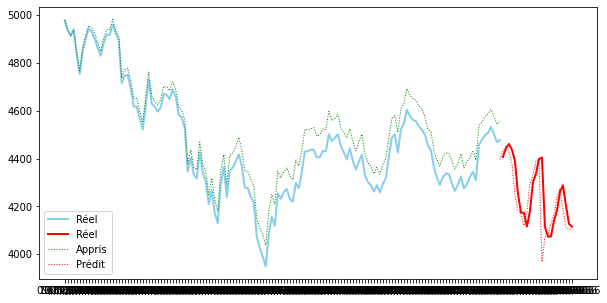

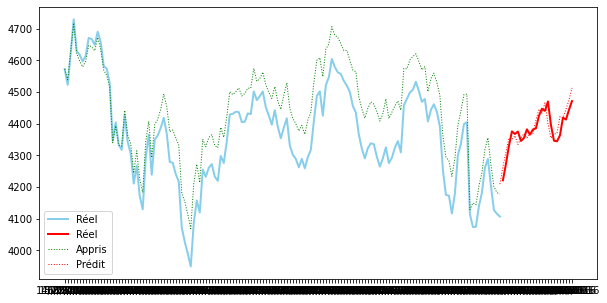

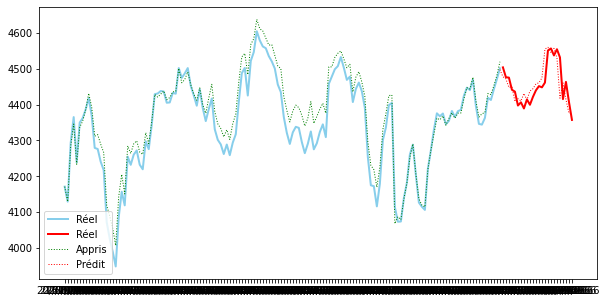

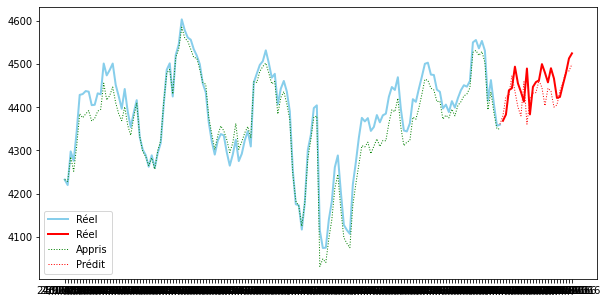

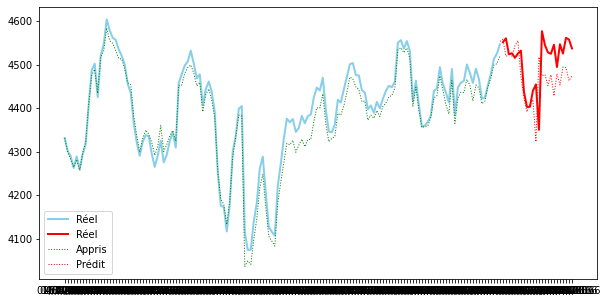

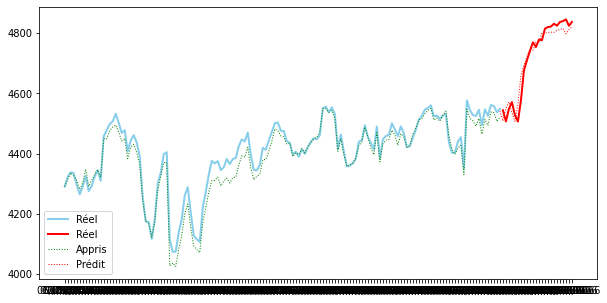

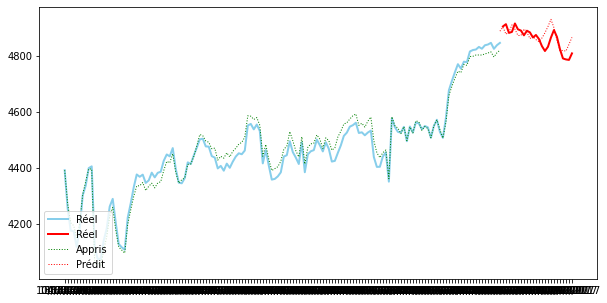

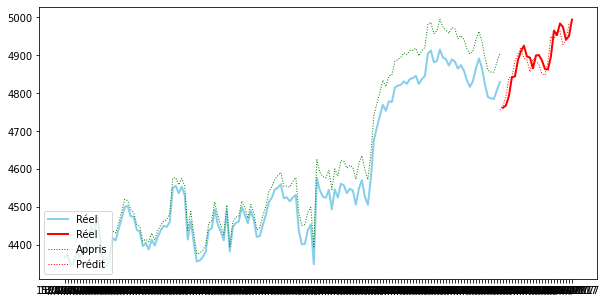

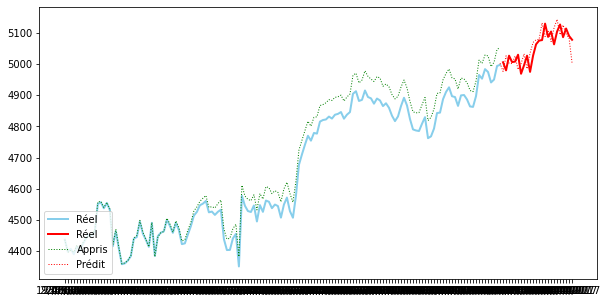

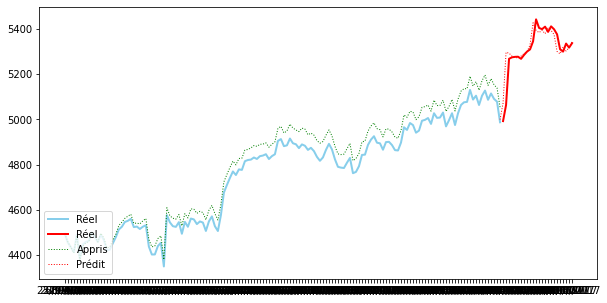

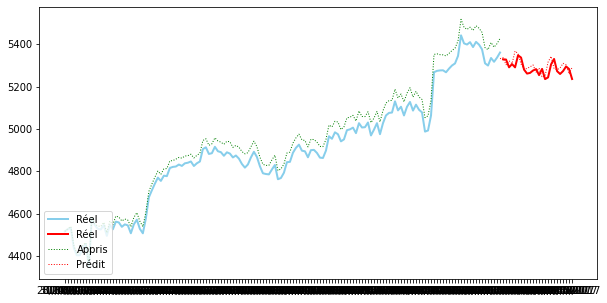

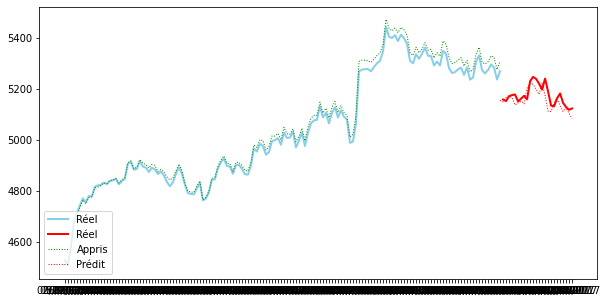

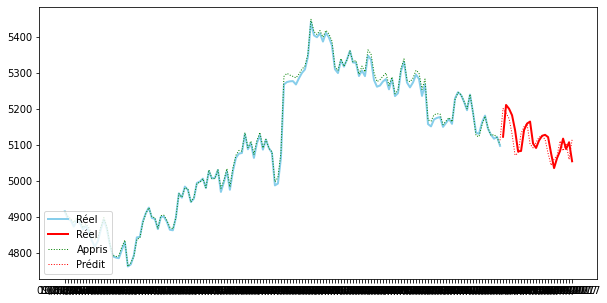

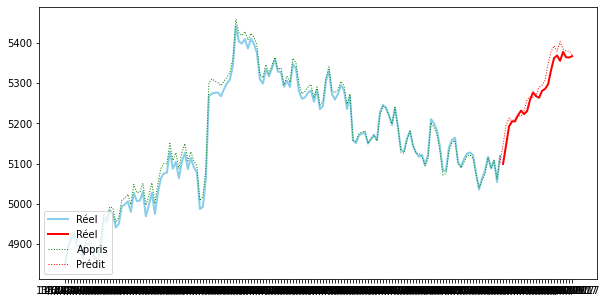

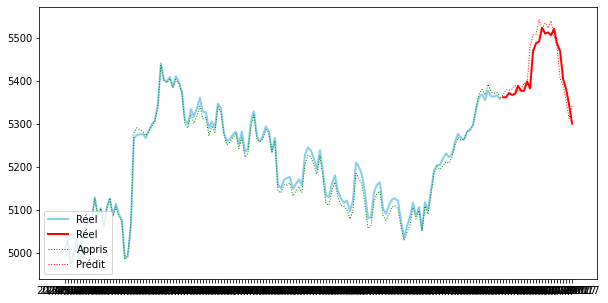

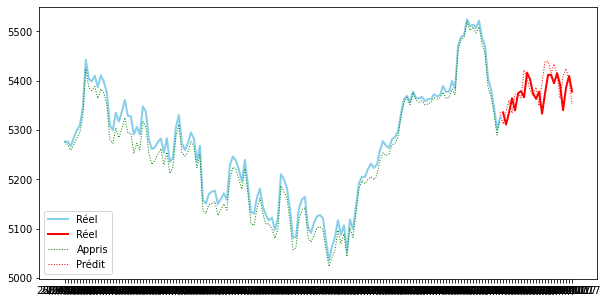

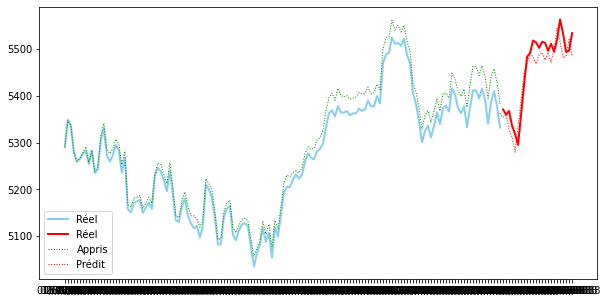

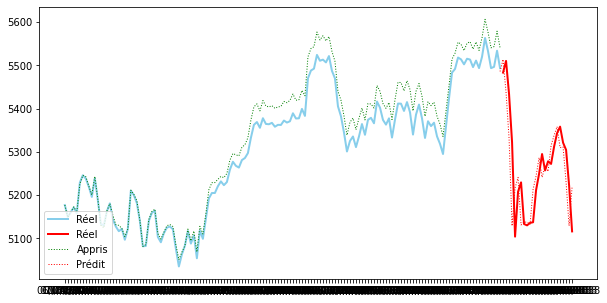

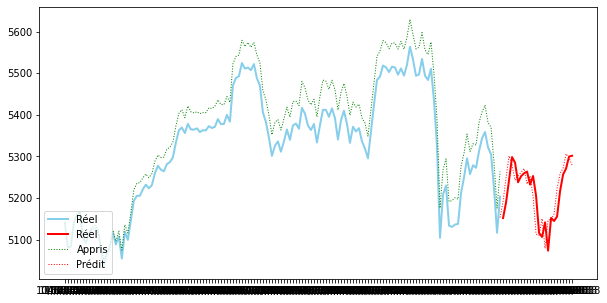

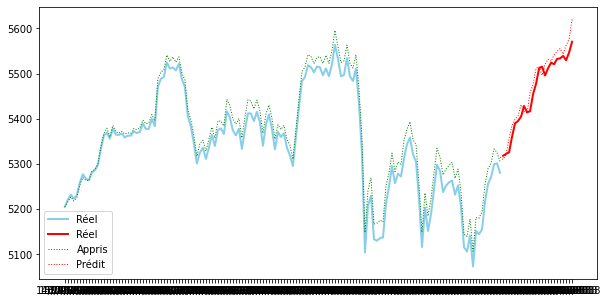

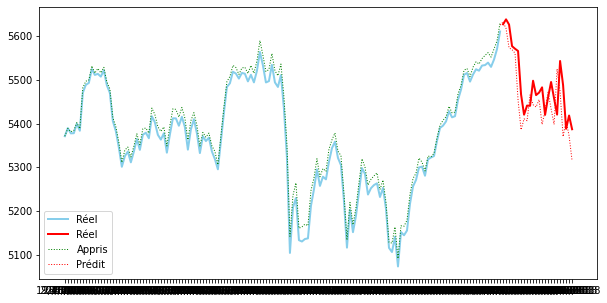

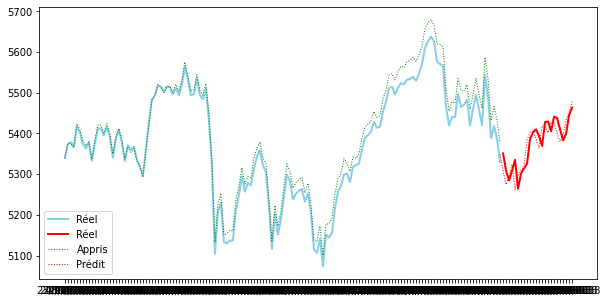

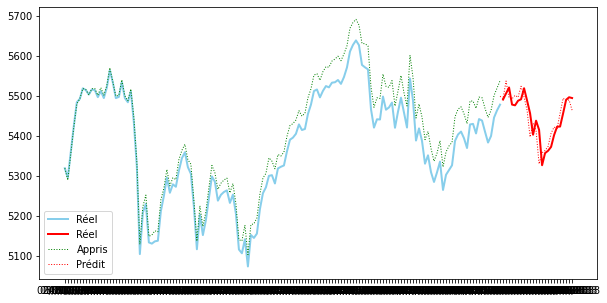

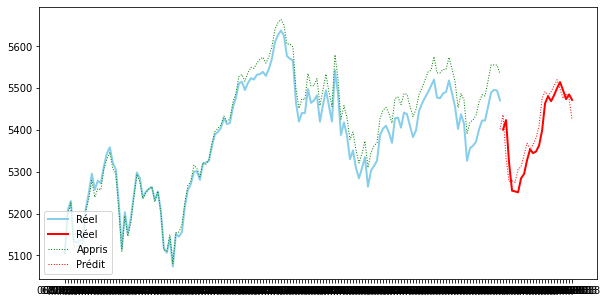

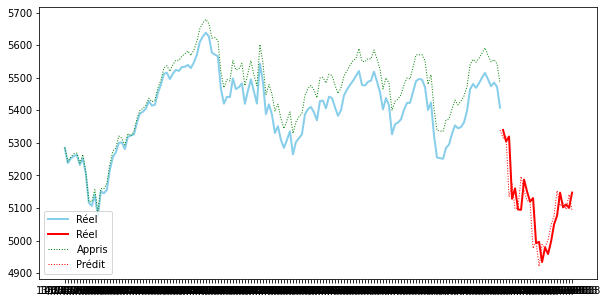

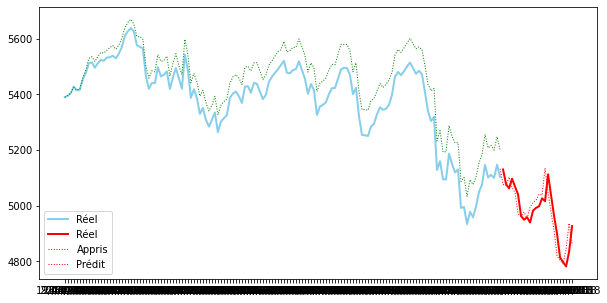

In [0]:
#Regression lineaire avec la selection de variable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.metrics import mean_squared_error
errorOLS =[]
betaMatOLSFinal = []

i=0
while i<(len(trainSub)-1):
  print(i)  
  print(trainSub[i],(trainSub[i+1]+1),testSub[i],(testSub[i+1]+1))
  xTrain = rateCompagnies.iloc[trainSub[i]:(trainSub[i+1]+1), 1:p]
  xTest = rateCompagnies.iloc[testSub[i]:(testSub[i+1]+1), 1:p]
  yTrain = rateCAC.iloc[trainSub[i]:(trainSub[i+1]+1), 1]
  yTest = rateCAC.iloc[testSub[i]:(testSub[i+1]+1), 1]
  print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)
  model = OLSnonNeg()
  model.fit(np.array(xTrain), list(yTrain))
  yPred = model.predict(np.array(xTest))

  #Transformation return en indice
  yFitted = toIndice(model.predict(np.array(xTrain)), dataCAC40.iloc[trainSub[i], 1])
  yPredCours = toIndice(yPred, dataCAC40.iloc[testSub[i], 1])[1:len(yPred)+1]
  yTestCours = toIndice(list(yTest), dataCAC40.iloc[testSub[i], 1])[1:len(yTest)+1]
  #Calcul erreur
  errorOLS.append(mean_squared_error(yTestCours, yPredCours))
  print(model.coef_)

  betaMatOLSFinal.append(model.coef_)

  # multiple line plot
  fig = plt.figure(figsize=(10,5))
  print("Longueur test", len(dataCAC40.iloc[trainSub[i]:testSub[i]+1,:]), len(list(yFitted)), len(dataCAC40.iloc[(testSub[i]+1):(testSub[i+1]+1),:]), len(list(yPredCours)))
  plt.plot('Date', 'Cours', data=dataCAC40.iloc[trainSub[i]:testSub[i]+1,:], color='skyblue', linewidth=2)
  plt.plot('Date', 'Cours', data=dataCAC40.iloc[testSub[i]+1:testSub[i+1]+1,:], color='red', linewidth=2)
  plt.plot(dataCAC40.iloc[trainSub[i]:testSub[i]+1,0], list(yFitted), linewidth=1, linestyle = ':', color = 'green')
  plt.plot(dataCAC40.iloc[testSub[i]:testSub[i+1]+1,0], list(yPredCours), linewidth=1, linestyle = ':', color = 'red')
  plt.legend(['Réel', 'Réel', 'Appris', 'Prédit'], loc='lower left')
  i = i+2
print(errorOLS)

Comparaison d'erreur

In [0]:
errorComp = pd.DataFrame()
errorComp['Lasso'] = error
errorComp['EN'] = errorEN
errorComp['OLS'] = errorOLS

In [0]:
np.mean(error)

339.05853236701313

In [0]:
np.mean(errorEN)

253.4646101494849

In [0]:
np.mean(errorOLS)

254.15597916303122

In [0]:
errorComp

Lasso           EN          OLS
0     37.013643    19.550220   139.980418
1     36.412683    26.956502    12.278774
2     51.630326    36.822740    53.959461
3     37.702989   170.140151    67.731360
4     42.906404    28.357839    50.167830
5     57.214555   143.777311    91.903381
6     76.929375   179.404902    32.506132
7    129.265762   152.690317    59.775140
8    411.728585    44.482191   208.253399
9     46.033530    40.507517    37.711105
10   642.901651   479.036465   308.251541
11   294.715852   158.356844   177.914824
12   215.541460   170.117279    44.701189
13   643.268489   727.163132   231.047707
14   839.979266   906.197696   968.431838
15   155.055835   270.341909   138.587478
16   152.937797   113.450762   115.054391
17   944.830345   498.864984   885.119761
18  4605.306573   105.274890  2426.002959
19   328.548670    64.310078   347.662232
20   321.855787   350.899902   639.414437
21   150.821895   181.080630   107.711407
22    70.737221    19.977832    62.939520
23   164.488567   227.669159   162.835298
24   243.438416   198.211439   271.091589
25   393.758850   611.673151   295.718587
26    57.357211   114.207188    53.927904
27   158.077204   115.239222   162.810358
28   238.669863   393.711526   150.665553
29   458.420189   335.361812   233.329658
30   405.723236  1064.000444   430.587771
31    60.728259   261.257781    98.959860
32    25.055813    88.819221    19.254090
33    71.554509   142.491286    63.620166
34   362.446330   649.655288   455.916178
35    55.467838    88.755218    64.035676
36    95.456810   156.597183    67.718391
37   104.881916   123.286282   190.199235
38   182.709885   405.758762    76.420644
39   190.767706   274.127351   162.041924

In [0]:
errorComp.describe()

Lasso           EN          OLS
count    40.000000    40.000000    40.000000
mean    339.058532   253.464610   254.155979
std     726.726777   246.986850   412.895872
min      25.055813    19.550220    12.278774
25%      59.885497   101.160972    63.450005
50%     156.566519   164.237062   139.283948
75%     337.023085   339.246334   242.770141
max    4605.306573  1064.000444  2426.002959

# II-Portfolio Selection

### WEIGHTED ELASTIC NET PENALIZED PORTFOLIOS

In [0]:
import pandas as pd
import numpy as np
import os


In [0]:
dataCompagnies =pd.read_csv('DataCompagnies.csv',delimiter=';', decimal = ',')
dataCompagnies.head()

Date  FR0000045072  ...  NL0000235190  FR0011981968
0  02/01/13         6.211  ...        30.000           NaN
1  03/01/13         6.349  ...        30.000           NaN
2  04/01/13         6.352  ...        30.255           NaN
3  07/01/13         6.410  ...        30.850           NaN
4  08/01/13         6.573  ...        30.910           NaN

[5 rows x 41 columns]

In [0]:
dataCompagnies['Date'] = pd.to_datetime(dataCompagnies['Date']).dt.strftime("%d/%m/%y")
index = pd.DatetimeIndex(dataCompagnies['Date'])
dataCompagnies = dataCompagnies.set_index(index)
del dataCompagnies['Date']
dataCompagnies.head()

FR0000045072  FR0000051732  ...  NL0000235190  FR0011981968
Date                                    ...                            
2013-01-02         6.211         53.35  ...        30.000           NaN
2013-01-03         6.349         52.87  ...        30.000           NaN
2013-01-04         6.352         53.12  ...        30.255           NaN
2013-01-07         6.410         52.70  ...        30.850           NaN
2013-01-08         6.573         53.00  ...        30.910           NaN

[5 rows x 40 columns]

In [0]:
dataCAC40 =pd.read_csv('DataCAC40.csv',delimiter=';', decimal = ',')
dataCAC40['Date'] = pd.to_datetime(dataCAC40['Date']).dt.strftime("%d/%m/%y")
index = pd.DatetimeIndex(dataCAC40['Date'])
dataCAC40 = dataCAC40.set_index(index)
del dataCAC40['Date']
dataCAC40.head()

Cours
Date               
2013-01-02  3703.97
2013-01-03  3725.92
2013-01-04  3712.93
2013-01-07  3731.67
2013-01-08  3694.15

In [0]:
def to_return(data, index,name):
    data_r = (np.array(data[name])[1:]-np.array(data[name])[0:-1])/np.array(data[name][0:-1])
    data_return = pd.DataFrame({'return':data_r}, index = index[1:])
    return data_return

In [0]:
dataCAC40_return = to_return(dataCAC40, index,'Cours')
dataCompagnies_return = dataCompagnies[dataCompagnies.columns[:-1]][1:].copy()
for name in dataCompagnies.columns[:-1]:
    dataCompagnies_return[name]=to_return(dataCompagnies, index,name)
dataCompagnies_return.head()

FR0000045072  FR0000051732  ...  NL0000226223  NL0000235190
Date                                    ...                            
2013-01-03      0.022219     -0.008997  ...      0.022719      0.000000
2013-01-04      0.000473      0.004729  ...      0.020423      0.008500
2013-01-07      0.009131     -0.007907  ...     -0.018610      0.019666
2013-01-08      0.025429      0.005693  ...      0.021288      0.001945
2013-01-09      0.017952     -0.005849  ...      0.032055      0.002912

[5 rows x 39 columns]

In [0]:
dataCAC =pd.read_csv('data_cac.csv',delimiter=',', decimal = '.')
dataCAC.head()

date   value
0  1990-03-01  1832.0
1  1990-03-02  1860.0
2  1990-03-05  1874.0
3  1990-03-06  1872.0
4  1990-03-07  1880.0

In [0]:
dataCAC['date'] = pd.to_datetime(dataCAC['date'])
index = pd.DatetimeIndex(dataCAC['date'])
dataCAC = dataCAC.set_index(index)
del dataCAC['date']
dataCAC.head()
dataCAC.columns = ['value']

In [0]:
#data de 1990 à 2012:
data_hist_daily= dataCAC.loc[pd.to_datetime('1990-03-01'):pd.to_datetime('2012-12-31')]
#to return 
data_hist_daily_return = to_return(data_hist_daily, data_hist_daily.index,'value')
data_hist_daily_return.head()

return
date                
1990-03-02  0.015284
1990-03-05  0.007527
1990-03-06 -0.001067
1990-03-07  0.004274
1990-03-08  0.019681

### Estimation matrice covariance et moyenne

On effectue l'estimation de la moyenne avec un estimateur James-Stein proposé pour les méthodes d'optimisation de portefeuille.

$$\hat{\mu}= (1-\rho)\mu_s + \rho \eta \mathbb{1}_N$$
avec $\mu_s$ est le vecteur des moyennes, et $\eta$ est le maximum entre la moyenne des moyennes des assets et le retour quotidien historique de l'euro stock market pendant la mm période de training(a.k.a du CAC40 pendant la période précédent la période d'investissement, dans l'article 1928-2000, investissement en 2001, Nous on utilise les données de 1990 à 2012). 
$$\rho= min\{1, \frac{N-2}{T_{train}(\mu_s -\eta 1)^T \hat{\Gamma}^{-1}(\mu_s -\eta 1)}\}$$
On note X le tableau des données moyenné à zero de dimensions $T*N$ avec N les nombres de variables aléatoires et T le nombre d'observations. $X = (x_t,k)_{t\in[1,T], k \in [1,N]}$. Soit $x_t$ la ligne t de la matrice S elle est de taille $1*p$.

Pour la covariance on utilise la formule suivante:
$$\hat{\Gamma}= \phi_1\Gamma_s + \phi_2 \mathbb{1}_N$$
Avec $\Gamma_s$ l'estimateur clasique de la matrice covariance (sample average).
$$\phi_1 = \frac{\alpha^2}{\delta^2}$$
$$\phi_2 = \frac{\beta^2}{\delta^2}\mu$$
Avec : $\mu = <\Gamma_s,I>$, $\delta^2 = d^2 = ||\Gamma_s-\mu I||^2$, $\bar{b}^2 = \frac{1}{T^2} \sum_{t=1}^T ||transpose(x_t) x_t-\Gamma_s||^2$
, $\beta^2 = min(\bar{b}^2,d^2)$ and $\alpha^2 = d^2 -b^2$.

la norme $||||^2$ est associée au produit scalaire $<,>$ est la norme de Frobenies elle est définit par: 

$$||X||^2 = trace(X^t X)/N$$


In [0]:
def norm_Frobenies_2(A,B):
    return np.trace(np.dot(np.transpose(A),B))/A.shape[1]

In [0]:
def well_estimated(dataCompagnies_return,data_hist_daily_return):
    N = dataCompagnies_return.shape[1]
    T = dataCompagnies_return.shape[0]
    
    #estimation sample average
    sample_cov_mat = dataCompagnies_return.cov()
    sample_mean_vect = dataCompagnies_return.mean(0)

    mu = norm_Frobenies_2(np.array(sample_cov_mat),np.ones(sample_cov_mat.shape))
    delta = norm_Frobenies_2(np.array(sample_cov_mat)-mu*np.ones(sample_cov_mat.shape),np.array(sample_cov_mat)-mu*np.ones(sample_cov_mat.shape))
    
    b_bar = 0
    for i in range(T):
        bb = np.array(dataCompagnies_return.iloc[i]).reshape((dataCompagnies_return.shape[1],1))
        aa = np.dot(bb,np.transpose(bb))-np.array(sample_cov_mat)
        b_bar += norm_Frobenies_2(aa,aa)
    b_bar*=(1/T**2)
    
    beta = min(b_bar,delta)
    alpha = delta -beta
    Gamma = (beta*mu/delta) *np.ones(sample_cov_mat.shape) + (alpha/delta) *sample_cov_mat
    
    #mu
    eta = max(data_hist_daily_return.mean()['return'],sample_mean_vect.mean())
    vect = sample_mean_vect-eta*np.ones(N)
    inter = np.dot(np.dot(np.transpose(vect),np.linalg.inv(Gamma)),vect)
    rho = min(1,(N-2)/(T*inter))
    
    mean = (1-rho)*sample_mean_vect+rho*eta*np.ones(N)
    return Gamma, mean
    

In [0]:
Gamma , mean = well_estimated(dataCompagnies_return,data_hist_daily_return)
#estimation gamma
sample_cov_mat = dataCompagnies_return.cov()
sample_mean_vect = dataCompagnies_return.mean(0)

### Bootstrap pour estimer les vecteurs alpha et beta

In [0]:
from sklearn.utils import resample
#method = 0 si sample average , = 1 si shrinkage
#gamma et mean déjà estimer avec la méthode en paramètre

def bootstrap(dataCompagnies_return_train,data_hist_daily_return,Gamma,mean,K,p1,p2, method):
    
    N = dataCompagnies_return_train.shape[1]
    data = resample(dataCompagnies_return_train, replace = True)
    if method ==0:
        moyenne = data.mean(0)
        variance = data.cov()
    else:
        variance, moyenne = well_estimated(data,data_hist_daily_return)
    
    sample_err =pd.DataFrame(np.array((moyenne-mean)).reshape(1,N),columns=dataCompagnies_return_train.columns).abs()
    sample_cov_err =pd.DataFrame(np.array((np.diag(variance)-np.diag(Gamma))).reshape(1,N),columns=dataCompagnies_return_train.columns).abs()
    
    for i in range(1,K):
        
        data = resample(dataCompagnies_return_train, replace = True)
        if method ==0:
            moyenne = data.mean(0)
            variance = data.cov()
        else:
            variance, moyenne = well_estimated(data,data_hist_daily_return)
            
        vect_mean = pd.Series(np.array(moyenne-mean),index = dataCompagnies_return_train.columns)
        
        sample_err.loc[i]=list(vect_mean.abs())

        vect_var = pd.Series((np.diag(variance)-np.diag(Gamma)),index = dataCompagnies_return_train.columns)
        sample_cov_err.loc[i]=list(vect_var.abs())
    
    #percentile                         
    beta = np.percentile(sample_err,p2,axis =0)
    alpha = np.percentile(sample_cov_err,p1,axis =0)
    return alpha, beta
    

In [0]:
K = 1000
alpha, beta = bootstrap(dataCompagnies_return,data_hist_daily_return,sample_cov_mat,sample_mean_vect,K,75,75, 0)

### Split-Bregman Algorithm

In [0]:
def max_vect(a,b):
    res =[]
    for i in range(a.size):
        res.append(max(a[i],b[i]))
    return np.array(res).reshape(a.shape)
def shrink(x,param):
    return np.multiply(x/np.abs(x),max_vect(np.abs(x)-param,np.zeros(x.shape)))
def phi(w):
    return np.multiply(w,beta)

In [0]:
#algo 1 #ok
def split_bergman(Gamma,mu,alpha,beta,lambdaa,tol, n_max):
    

    R = 0.5*Gamma + np.multiply(np.eye(mu.size),alpha)

    b_0 = np.zeros(mu.shape)
    w_0 = np.zeros(mu.shape) +1/mu.size
    w = np.zeros(mu.shape) 
    d_0 = np.zeros(mu.shape)

    beta_2 = np.multiply(beta,beta)
    R_new = 2*R + lambdaa*np.multiply(np.eye(mu.size),beta_2)
    k = 0
    while np.linalg.norm(w - w_0) > tol and k < n_max:
        w_0 = w
        vect = mu-lambdaa*np.multiply(d_0-b_0,beta)
        w = np.linalg.solve(R_new,vect)
        phi_v = np.multiply(beta,w)
        d = shrink(phi_v+b_0,1/lambdaa)
        b = b_0 + phi_v - d
        b_0 = b
        d_0= d
        k+=1 
    return w,k,np.linalg.norm(w - w_0)


In [0]:
def cond_th3(R,mu,beta,epsilon,alpha_0,eta,w):
    vect = 2*np.dot(R,w)-mu
    verif = True
    calc = 0
    for i in range(mu.size):
        if abs(w[i])<eta or abs(w[i]) == 0:
            if (vect[i]>beta[i]-epsilon) or (vect[i]<-beta[i]+epsilon):
                verif = False
        if abs(w[i])> 0 and abs(w[i])>= eta:
            calc +=(vect[i]+beta[i]*np.sign(w[i]))**2
    if calc > 2*epsilon*alpha_0:
        verif = False
    return not verif

In [0]:
def result_mod_w(w,eta):
    ww = []
    for i in range(w.size):
        if np.abs(w[i])<eta:
            ww.append(0)
        else:
            ww.append(w[i])
    return ww

In [0]:
#algo 2
def modified_split_bergman(Gamma,mu,alpha,beta,lambdaa,tol,n_max):
    
    alpha_0 = min(alpha)
    epsilon = (2/(np.sqrt(2)+1)**2)*tol
    R = 0.5*Gamma + np.multiply(np.eye(mu.size),alpha)
    M = 2*np.linalg.norm(R)
    eta =0.9*min(epsilon,np.sqrt(epsilon*alpha_0))/(np.sqrt(mu.size)*M)

    b_0 = np.random.rand(mu.size)
    w = np.random.rand(mu.size)
    d_0 = np.abs(w)
    
    beta_2 = np.multiply(beta,beta)
    R_new = 2*R + lambdaa*np.multiply(np.eye(mu.size),beta_2)
    k = 0
    while cond_th3(R,mu,beta,epsilon,alpha_0,eta,w) and k < n_max:
        vect = mu-lambdaa*np.multiply(d_0-b_0,beta)
        w = np.linalg.solve(R_new,vect)
        phi_v = np.multiply(beta,w)
        d = shrink(phi_v+b_0,1/lambdaa)
        b = b_0 + phi_v - d
        b_0 = b
        d_0= d
        k+=1 
    return result_mod_w(w,eta),k,d_0


In [0]:
w,k,err = split_bergman(Gamma,mean,alpha,beta,1,10**(-5),10**7)

In [0]:
ww,kk,dk = modified_split_bergman(Gamma,mean,alpha,beta,1,10**(-4),10**6)

KeyboardInterrupt: ignored

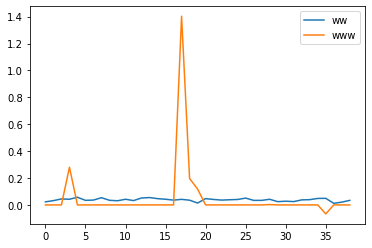

In [0]:
import matplotlib.pyplot as plt
plt.plot(ww,label='ww')
plt.plot(www,label = 'www')
plt.legend()

In [0]:
w3,k3 = modified_split_bergman(Gamma,mu,alpha,beta,lambdaa,10**(-5))

In [0]:
w4,k4 = modified_split_bergman(sample_cov_mat,sample_mean_vect,alpha,beta,lambdaa,10**(-5))

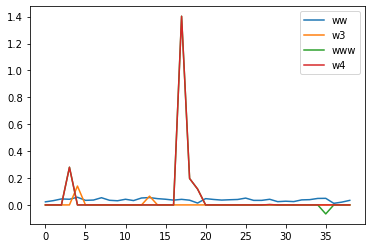

In [0]:
plt.plot(ww,label='ww')
plt.plot(w3,label = 'w3')
plt.plot(www,label = 'www')
plt.plot(w4,label = 'w4')
plt.legend()

### Division données par période de 63 jours ouvrés


On calcule des nouveaux portefeuilles chaque 63 jours ouvrés utilisant les rendements quotidient des 252 jrs ouvrés précédent

In [0]:
p1 = 75
p2 = 75
n_max = 10**7
tol = 10**(-5)
lambdaa=1
w_vecteur = []
w_vecteur_c = []
K = 1000
T = dataCompagnies_return.shape[0]

data_periode = dataCompagnies_return.iloc[0:252]#calcul premier portefeuil
Gamma , mean = well_estimated(data_periode,data_hist_daily_return)
#estimation sample average
Gamma_c = data_periode.cov()
mean_c = data_periode.mean(0)

#method = 0 si sample average , = 1 si shrinkage
alpha_c, beta_c = bootstrap(data_periode,data_hist_daily_return,Gamma_c,mean_c,1000,p1,p2, method = 0)
alpha, beta = bootstrap(data_periode,data_hist_daily_return,Gamma,mean,1000,p1,p2, method = 1)

w_vecteur.append(split_bergman(Gamma,mean,alpha,beta,lambdaa,tol,n_max)[0])

w_vecteur_c.append(split_bergman(Gamma_c,mean_c,alpha_c,beta_c,lambdaa,tol,n_max)[0])

rendement=[]
rendement_c=[]
i=1
while (252+i*63)<T:
    data_periode = dataCompagnies_return.iloc[i*63:252+i*63]#calcul premier portefeuil
    Gamma , mean = well_estimated(data_periode,data_hist_daily_return)
    #estimation sample average
    Gamma_c = data_periode.cov()
    mean_c = data_periode.mean(0)

    #method = 0 si sample average , = 1 si shrinkage
    alpha_c, beta_c = bootstrap(data_periode,data_hist_daily_return,Gamma_c,mean_c,K,p1,p2, method = 0)
    alpha, beta = bootstrap(data_periode,data_hist_daily_return,Gamma,mean,K,p1,p2, method = 1)

    w_vecteur.append(split_bergman(Gamma,mean,alpha,beta,lambdaa,tol,n_max)[0])
    w_vecteur_c.append(split_bergman(Gamma_c,mean_c,alpha_c,beta_c,lambdaa,tol,n_max)[0])
    
    if 252+(i+1)*63<T:
        new_data = dataCompagnies_return.iloc[252+i*63:252+(i+1)*63]
    else:
        new_data = dataCompagnies_return.iloc[252+i*63:]
    
    rendement.append(np.array(new_data.dot(np.transpose(w_vecteur))))
    rendement_c.append(np.array(new_data.dot(np.transpose(w_vecteur_c))))
    i+=1
    
moyenne = 0
for i in range(len(rendement)):
    moyenne += np.sum(rendement[i])

risque = 0   
for i in range(len(rendement)):
    risque += (np.sum((rendement[i]-moyenne)**2))

SR = (moyenne/T)/(np.sqrt(risque/T))

moyenne_c = 0
for i in range(len(rendement_c)):
    moyenne_c += np.sum(rendement_c[i])

risque_c = 0   
for i in range(len(rendement_c)):
    risque_c += (np.sum((rendement_c[i]-moyenne_c)**2))

SR_c = (moyenne_c/T)/(np.sqrt(risque_c/T))

In [0]:
def SR_W(dataCompagnies_return,data_hist_daily_return,p1,p2,K,lambdaa,n_max,tol,method):
    w_vecteur = []
    T = dataCompagnies_return.shape[0]

    data_periode = dataCompagnies_return.iloc[0:252]#calcul premier portefeuil
    if method ==1:
        Gamma , mean = well_estimated(data_periode,data_hist_daily_return)
    else:
        #estimation sample average
        Gamma = data_periode.cov()
        mean = data_periode.mean(0)


    alpha, beta = bootstrap(data_periode,data_hist_daily_return,Gamma,mean,K,p1,p2, method)
    
    w_vecteur.append(split_bergman(Gamma,mean,alpha,beta,lambdaa,tol,n_max)[0])
    
    i=1
    while (252+i*63)<T:
        data_periode = dataCompagnies_return.iloc[i*63:252+i*63]#calcul premier portefeuil
        if method ==1:
            Gamma , mean = well_estimated(data_periode,data_hist_daily_return)
        else:
            #estimation sample average
            Gamma = data_periode.cov()
            mean = data_periode.mean(0)

        alpha, beta = bootstrap(data_periode,data_hist_daily_return,Gamma,mean,K,p1,p2, method )

        w_vecteur.append(split_bergman(Gamma,mean,alpha,beta,lambdaa,tol,n_max)[0])
        
        if 252+(i+1)*63<T:
            new_data = dataCompagnies_return.iloc[252+i*63:252+(i+1)*63]
        else:
            new_data = dataCompagnies_return.iloc[252+i*63:]

        rendement.append(np.array(new_data.dot(np.transpose(w_vecteur))))
        i+=1
    moyenne = 0
    for i in range(len(rendement)):
        moyenne += np.sum(rendement[i])

    risque = 0   
    for i in range(len(rendement)):
        risque += (np.sum((rendement[i]-moyenne)**2))

    SR = (moyenne/T)/(np.sqrt(risque/T))
    return SR,w_vecteur

## Sharpe Ratio et performance

In [0]:
# data download 
import yahoofinancials
import pandas as pd

assets = ['ACCP']
yahoo_financials = yahoofinancials.YahooFinancials(assets)
data = yahoo_financials.get_historical_price_data(start_date='2000-01-01', 
                                                  end_date='2019-12-31', 
                                                  time_interval='daily')
Data_compagnies_CAC40 = pd.DataFrame({
    a: {x['formatted_date']: x['adjclose'] for x in data[a]['prices']} for a in assets
})
Data_compagnies_CAC40 = Data_compagnies_CAC40.drop('date', axis=1).set_index('formatted_date')['close']
Data_compagnies_CAC40.head()

KeyboardInterrupt: ignored

In [0]:
,
         , 'AIR','MT','ATOS','AXAF','BNPP','BOUY','CAPP','CARR','CAGR','DANO','DAST','ENGIE','ESLX','HRMS','PRTP','OREP','LEGD','LVMH',
         'MICP','ORAN','PERP','PEUP','PUBP','RENA','SAF','SGOB','SASY','SCHN',
         'SOGN','EXHO','STM','TCFP','TOTF','VIE','SGEF','VIV','URW','WLN'